# Run 3e1nfbiz

In [12]:
import os
from os import path
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import gym
import torch
from torch import nn
import torch.nn.functional as F
from torch.distributions.normal import Normal

from AssemblyGym.envs import FuselageActuators

def make_env(env_id, seed, idx, n_actions, record):
    def thunk():
        env = gym.make(env_id, n_actuators=n_actions, mode="Test", record=record, seed=seed, port=50056+idx)
        #env = gym.wrappers.RecordEpisodeStatistics(env)
        return env

    return thunk

def layer_init(layer, std=np.sqrt(2), bias_const=0.0):
    torch.nn.init.orthogonal_(layer.weight, std)
    torch.nn.init.constant_(layer.bias, bias_const)
    return layer

class Agent(nn.Module):
    def __init__(self, envs):
        super().__init__()
        self.critic = nn.Sequential(
            layer_init(nn.Linear(np.array(envs.observation_space.shape).prod(), 64)),
            nn.Tanh(),
            layer_init(nn.Linear(64, 64)),
            nn.Tanh(),
            layer_init(nn.Linear(64, 1), std=1.0),
        )
        # layers for self.actor_mean
        self.fc1 = layer_init(nn.Linear(np.array(envs.observation_space.shape).prod(), 64))
        self.fc2 = layer_init(nn.Linear(64, 64))
        self.fc3 = layer_init(nn.Linear(64, np.prod(envs.action_space.shape)), std=0.01)
        
        self.actor_logstd = nn.Parameter(1*torch.ones(1, np.prod(envs.action_space.shape)), requires_grad=False)  # initial action_std = exp(actor_logstd)

    def get_value(self, obs):
        return self.critic(obs)

    def get_action_and_value(self, obs, action=None, scaleStd=1):
        # Start with standard MLP
        x = torch.tanh(self.fc1(obs))
        x = torch.tanh(self.fc2(x))
        action_mean = torch.tanh(self.fc3(x))
        # Build action distribution
        action_logstd = self.actor_logstd #.expand_as(action_mean)
        action_std = torch.exp(action_logstd)*scaleStd
        probs = Normal(action_mean, action_std)
        if action is None:
            action = probs.sample()
        if action == "deterministic":
            action = action_mean
        return action, probs.log_prob(action).sum(1), probs.entropy().sum(1), self.critic(obs)



In [2]:
env_id = "FuselageActuators-v22"
n_actions=10
file2 ='C:/Users/TL/Projects/Fuselage Actuator Reinforcement Learning/AssemblyGym/AssemblyGym/envs/FuselageActuators/AnsysFiles/Benchmark/SolutionInputUndeformed.inp'
file1 ='C:/Users/TL/Projects/Fuselage Actuator Reinforcement Learning/AssemblyGym/AssemblyGym/envs/FuselageActuators/AnsysFiles/Benchmark/SolutionInputUndeformed.inp'
env0 = gym.make(env_id, n_actuators=n_actions, mode="File", file1=file1, file2=file2,  port=50057)
obs = env0.reset()

perfectPos = env0.initPos



PyMAPDL is taking longer than expected to connect to an MAPDL session.
Checking if there are any available licenses...
PyMAPDL is taking longer than expected to connect to an MAPDL session.
Checking if there are any available licenses...
Product:             Ansys Mechanical Enterprise Academic Teaching
MAPDL Version:       22.1
ansys.mapdl Version: 0.64.0

Running on 4 processors


c:\Users\TL\Documents\PythonVENV\venv3_10-pyAnsys\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\TL\Documents\PythonVENV\venv3_10-pyAnsys\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\TL\Documents\PythonVENV\venv3_10-pyAnsys\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
c:\Users\TL\Documents\PythonVENV\venv3_10-pyAn

Initial shape from SolutionInputDP42
Target shape from SolutionInputDP43
****************************** Episode: 1 ******************************
Initial shape from SolutionInputDP43
Target shape from SolutionInputDP52
Exit Ansys and try to reconnect
No active Ansys process found. Wait and try to reconnect
Reconnect failed - remote exit again
Wait and try to reconnect again - attempt 1
Reconnect failed - remote exit again
Wait and try to reconnect again - attempt 2
Product:             Ansys Mechanical Enterprise Academic Teaching
MAPDL Version:       22.1
ansys.mapdl Version: 0.64.0

Running on 4 processors
Sucessfully reconnected to Ansys on attempt 3
Try running again
Simulation setup complete
Applied forces
Solve finished
Results ready
reward: 0.9796707070461225 final error: 0.015991766499513622


C:\Users\TL\AppData\Local\Temp\ipykernel_15992\911979686.py:111: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000268DC4E3160> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_15992\911979686.py:111: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000268DC4E3340> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


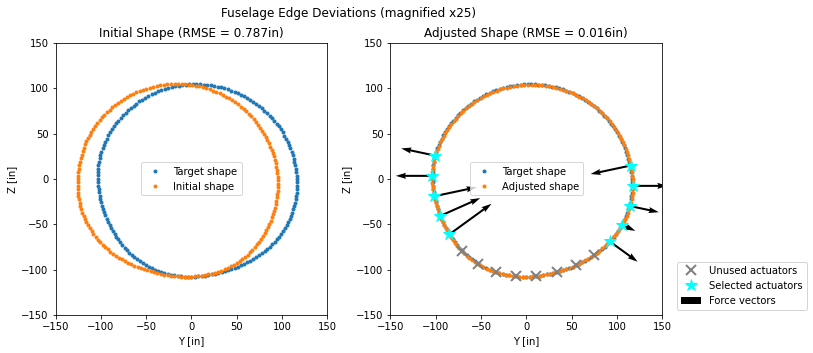

****************************** Episode: 2 ******************************
Initial shape from SolutionInputDP57
Target shape from SolutionInputDP58
reward: 0.9867782796041525 final error: 0.020563777845900664


C:\Users\TL\AppData\Local\Temp\ipykernel_15992\911979686.py:111: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000268DCAD3A30> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_15992\911979686.py:111: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000268DCAD3D30> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


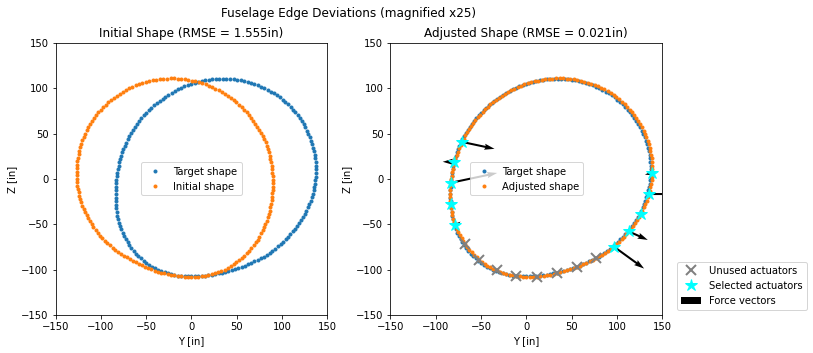

****************************** Episode: 3 ******************************
Initial shape from SolutionInputDP42
Target shape from SolutionInputDP52
reward: 0.9625450634415272 final error: 0.014833303625760658


C:\Users\TL\AppData\Local\Temp\ipykernel_15992\911979686.py:111: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000268DCA38100> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_15992\911979686.py:111: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000268DCA38400> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


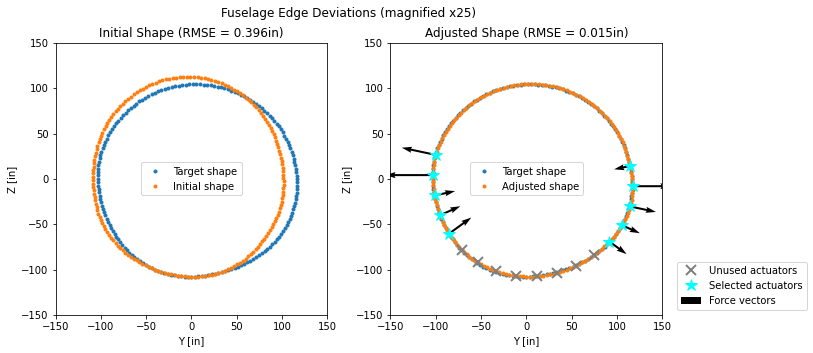

****************************** Episode: 4 ******************************
Initial shape from SolutionInputDP55
Target shape from SolutionInputDP58
reward: 0.9679996042099013 final error: 0.021898085355185833


C:\Users\TL\AppData\Local\Temp\ipykernel_15992\911979686.py:111: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000268DCD505B0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_15992\911979686.py:111: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000268DCD508B0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


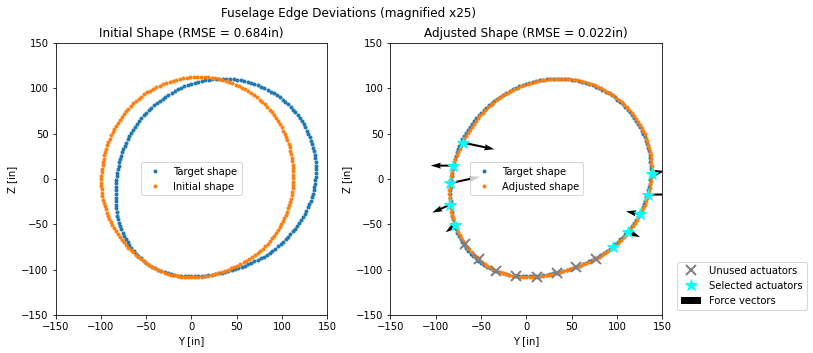

****************************** Episode: 5 ******************************
Initial shape from SolutionInputDP42
Target shape from SolutionInputDP49
reward: 0.9836849069658824 final error: 0.012777308636481669


C:\Users\TL\AppData\Local\Temp\ipykernel_15992\911979686.py:111: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000268DCCB1F30> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_15992\911979686.py:111: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000268DCCB2200> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


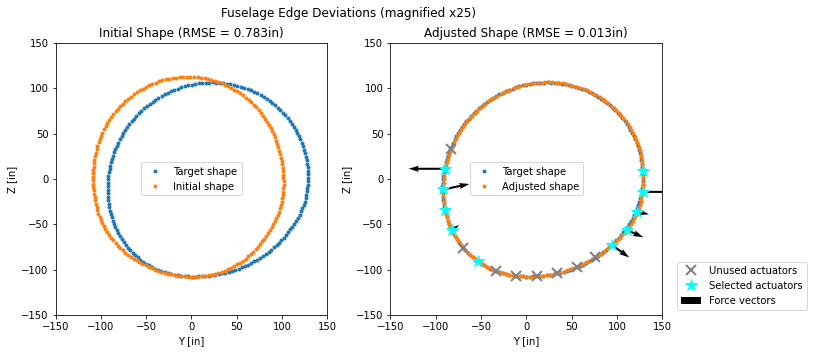

****************************** Episode: 6 ******************************
Initial shape from SolutionInputDP43
Target shape from SolutionInputDP48
reward: 0.9473622820136209 final error: 0.010490623861541364


C:\Users\TL\AppData\Local\Temp\ipykernel_15992\911979686.py:111: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000268D994EF80> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_15992\911979686.py:111: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000268D994F280> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


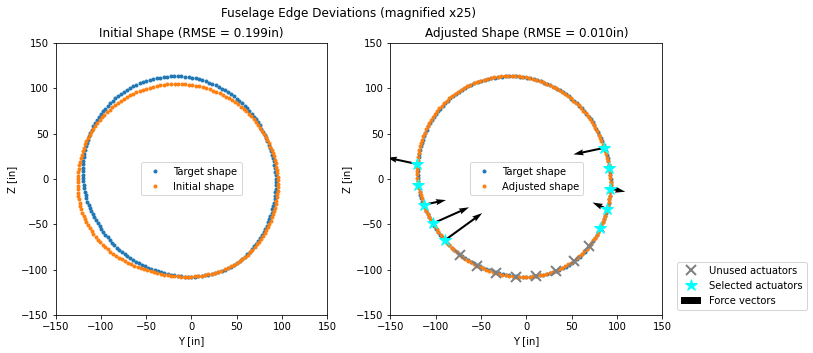

****************************** Episode: 7 ******************************
Initial shape from SolutionInputDP57
Target shape from SolutionInputDP44
reward: 0.9331165406278495 final error: 0.009298251124618538


C:\Users\TL\AppData\Local\Temp\ipykernel_15992\911979686.py:111: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000268DCCBDF90> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_15992\911979686.py:111: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000268DCCBF400> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


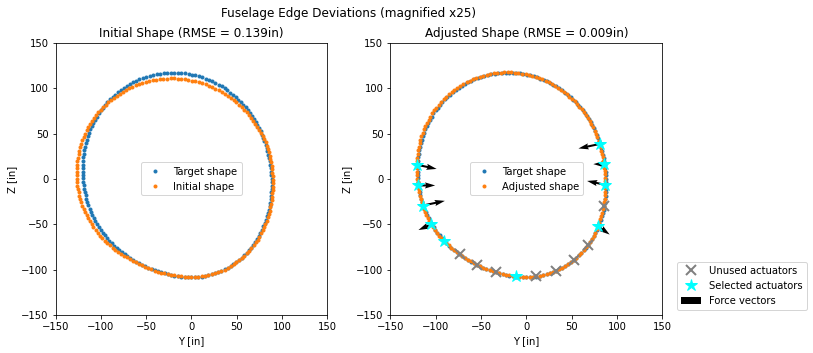

****************************** Episode: 8 ******************************
Initial shape from SolutionInputDP52
Target shape from SolutionInputDP53
reward: 0.9634433409723947 final error: 0.015554851947849795


C:\Users\TL\AppData\Local\Temp\ipykernel_15992\911979686.py:111: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000268D976C370> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_15992\911979686.py:111: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000268D976C7C0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


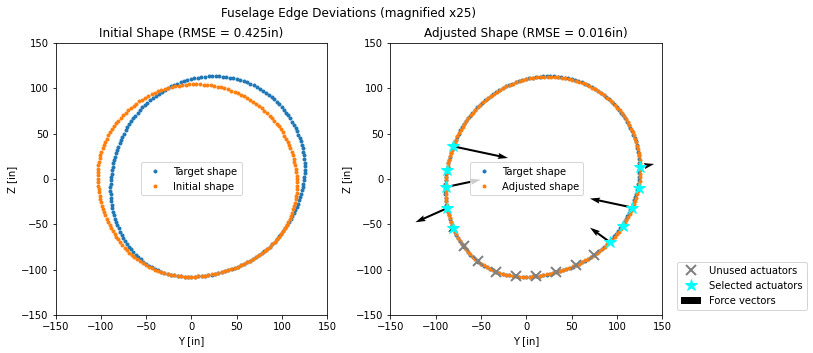

****************************** Episode: 9 ******************************
Initial shape from SolutionInputDP54
Target shape from SolutionInputDP56
reward: 0.9832683450321195 final error: 0.011015458498726503


C:\Users\TL\AppData\Local\Temp\ipykernel_15992\911979686.py:111: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000268D97E38E0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_15992\911979686.py:111: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000268D97E3190> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


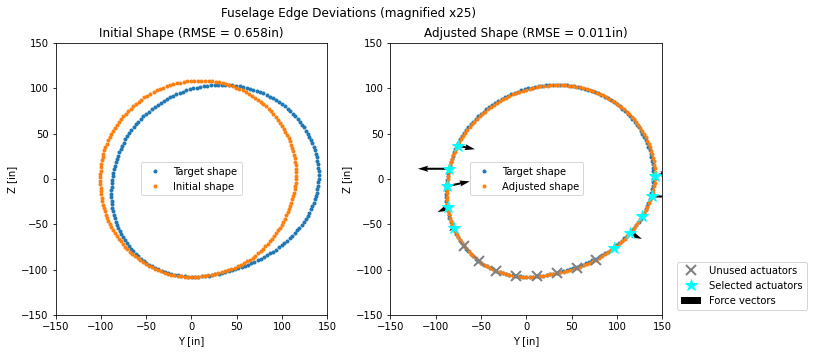

****************************** Episode: 10 ******************************
Initial shape from SolutionInputDP55
Target shape from SolutionInputDP46
reward: 0.9777189442616288 final error: 0.011820307416861799


C:\Users\TL\AppData\Local\Temp\ipykernel_15992\911979686.py:111: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000268D8E1A020> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_15992\911979686.py:111: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000268D8E19750> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


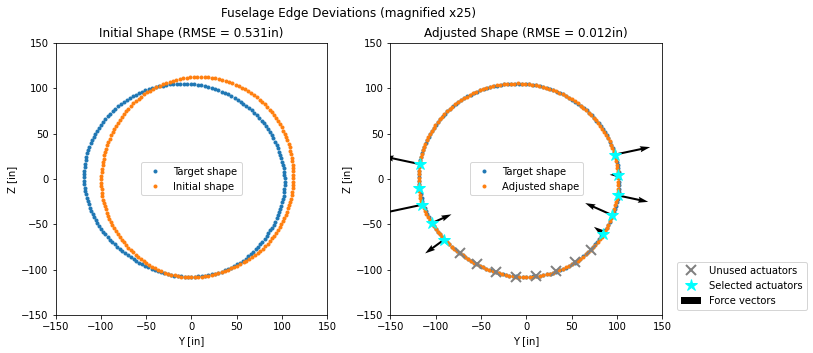

****************************** FINAL SUMMARY ******************************
**********************************************************
Inital error (mean) = 0.616
Initial error (median) = 0.594
Initial error (stdev) = 0.379
Initial error (max) = 1.555
**********************************************************
Final error (mean) = 0.014
Final error (median) = 0.014
Final error (stdev) = 0.004
Final error (max) = 0.022
**********************************************************
Max Deviation (mean) = 0.045
Max Deviation (median) = 0.044
Max Deviation (stdev) = 0.015
Max Deviation (max) = 0.080
**********************************************************
Max Force (mean) = 232.646
Max Force (median) = 258.501
Max Force (stdev) = 55.743
Max Force (max) = 308.730


In [15]:
import os
from os import path
import numpy as np
import gym
from AssemblyGym.envs import FuselageActuators

n_actions = 10
# Make the environment
env_name = "FuselageActuators-v22"
# envs = gym.vector.SyncVectorEnv(
#     [make_env(env_name, 2 + i, i, n_actions, False) for i in range(1)]
# )

envs = gym.make(env_name, n_actuators=n_actions, mode="Test", record=False, seed=2, port=50056)

# Create agent
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
agent = Agent(envs).to(device)
agent.load_state_dict(torch.load(
            "./Agents/agent_32767872steps.pt", map_location=device))


# Perform benchmark test
obs = torch.Tensor(envs.reset()).to(device)
# Initialze variables
initErrors = []
finalErrors = []
maxDevs = []
maxForces = []
done=False

for i in range(10):
    print('*' * 30, f'Episode: {i+1}', '*' * 30)
    # Perform test and track error
    obs = torch.Tensor(envs.reset()).to(device)
    initError = envs.error_initial #get_attr("error_initial")#[0]#error_initial
    initPos = envs.initPos #get_attr("initPos")[0]
    targetPos = envs.targetPos #get_attr("targetPos")[0]
    initDev = envs.deviations #get_attr("deviations")[0]
    episodeReward=0

    with torch.no_grad():
        action, logprob, _, value = agent.get_action_and_value(obs, action="deterministic")
    obs, reward, done, info = envs.step(action.cpu().numpy())
    obs = torch.Tensor(obs).to(device)
    episodeReward += reward
    print("reward:", episodeReward, "final error:", info["Error"])
    initErrors.append(info["initError"])
    finalErrors.append(info["Error"])
    maxDevs.append(info["maxDev"])
    maxForces.append(np.max(np.abs(info["Forces"])))


    finalError = envs.error #get_attr("error")#[0] #env.error
    finalPos = envs.initPos + envs.displacements # envs.get_attr("initPos")[0] + envs.get_attr("displacements")[0]
    finalDev = envs.deviations #get_attr("deviations")[0]
    forces = envs.forces #get_attr("forces")[0]
    forcesY = envs.forces_Y #get_attr("forces_Y")[0]
    forcesZ = envs.forces_Z #get_attr("forces_Z")[0]
    forcesActive = np.argwhere(forces!=0)
    forcesInactive = np.argwhere(forces==0)

    # Actuator locations
    angles = np.linspace(12, -192, 18)
    angles[17] =168
    anglesTarget = np.rad2deg(np.arctan2(targetPos[:,1],targetPos[:,0]))
    anglesInit = np.rad2deg(np.arctan2(initPos[:,1],initPos[:,0]))
    actuatorIds = np.absolute(np.expand_dims(angles,1)-np.expand_dims(anglesInit,1).T).argmin(axis=1)

    # Initial and final positions for visualization
    mag = 25
    initPosVis = perfectPos + (initPos-perfectPos)*mag
    targetPosVis = perfectPos + (targetPos-perfectPos)*mag 
    finalPosVis = targetPos + (finalPos-perfectPos)*mag

    # Plot
    fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(11, 5))
    fig.suptitle('Fuselage Edge Deviations (magnified x%i)' %(mag, ))
    # Plot of initial positions
    axs[0].plot(targetPosVis[:,0], targetPosVis[:,1], '.')
    axs[0].plot(initPosVis[:,0], initPosVis[:,1], '.')
    # axs[0].plot(targetPos[actuatorIds,0], targetPos[actuatorIds,1], 'x')
    # C= np.sqrt(initDev[0]**2+initDev[1]**2) # magnitude of displacements - use for color in quivers
    # axs[0].quiver(initPosVis[:,0], initPosVis[:,1], targetPos[:,0]-initPosVis[:,0], targetPos[:,1]-initPosVis[:,1], C, angles='xy', scale=1, units='xy')
    axs[0].axes.set_aspect('equal')
    axs[0].set_xlabel('Y [in]')
    axs[0].set_ylabel('Z [in]')
    axs[0].set_title('Initial Shape (RMSE = %.3fin)' %initError)
    axs[0].legend(['Target shape', 'Initial shape'], loc='center')
    axs[0].set_xlim(-150, 150)
    axs[0].set_ylim(-150, 150)

    # Plot of final positions
    axs[1].plot(targetPosVis[:,0], targetPosVis[:,1], '.')
    axs[1].plot(finalPosVis[:,0], finalPosVis[:,1], '.')
    #C= np.sqrt(finalDev) # magnitude of displacements - use for color in quivers
    #axs[1].quiver(finalPosVis[:,0], finalPosVis[:,1], targetPos[:,0]-finalPosVis[:,0], targetPos[:,1]-finalPosVis[:,1], C, angles='xy', scale=1, units='xy')
    axs[1].plot(finalPosVis[actuatorIds[forcesInactive],0], finalPosVis[actuatorIds[forcesInactive],1], 'x', color='grey', markersize=10, markeredgewidth=2)
    axs[1].plot(finalPosVis[actuatorIds[forcesActive],0], finalPosVis[actuatorIds[forcesActive],1], '*', color='cyan', markersize=12)
    axs[1].quiver(finalPosVis[actuatorIds[forcesActive],0], finalPosVis[actuatorIds[forcesActive],1], forcesY[forcesActive], forcesZ[forcesActive], angles='xy', scale=5, units='xy')
    axs[1].axes.set_aspect('equal')
    axs[1].set_xlabel('Y [in]')
    axs[1].set_ylabel('Z [in]')
    axs[1].set_title('Adjusted Shape (RMSE = %.3fin)' %finalError)
    first_legend = axs[1].legend(['Target shape', 'Adjusted shape'], loc='center')


    # Add the legend manually to the current Axes.
    axs[1].add_artist(first_legend)
    # Create another legend for the second line.
    axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))

    axs[1].set_xlim(-150, 150)
    axs[1].set_ylim(-150, 150)

    plt.draw()
    plt.savefig('./Plots/ResultViz'+str(i)+'.png', dpi=300, transparent=False, bbox_inches='tight')
    plt.show()


print('*' * 30, 'FINAL SUMMARY', '*' * 30)
print("**********************************************************")
print("Inital error (mean) = %.3f" %np.mean(initErrors))
print("Initial error (median) = %.3f" %np.median(initErrors))
print("Initial error (stdev) = %.3f" %np.std(initErrors))
print("Initial error (max) = %.3f" %np.max(initErrors))
print("**********************************************************")
print("Final error (mean) = %.3f" %np.mean(finalErrors))
print("Final error (median) = %.3f" %np.median(finalErrors))
print("Final error (stdev) = %.3f" %np.std(finalErrors))
print("Final error (max) = %.3f" %np.max(finalErrors))
print("**********************************************************")
print("Max Deviation (mean) = %.3f" %np.mean(maxDevs))
print("Max Deviation (median) = %.3f" %np.median(maxDevs))
print("Max Deviation (stdev) = %.3f" %np.std(maxDevs))
print("Max Deviation (max) = %.3f" %np.max(maxDevs))
print("**********************************************************")
print("Max Force (mean) = %.3f" %np.mean(maxForces))
print("Max Force (median) = %.3f" %np.median(maxForces))
print("Max Force (stdev) = %.3f" %np.std(maxForces))
print("Max Force (max) = %.3f" %np.max(maxForces))


****************************** FINAL SUMMARY ******************************
**********************************************************
Inital error (mean) = 0.637

Initial error (median) = 0.540

Initial error (stdev) = 0.406

Final error (max) = 1.569
**********************************************************
Final error (mean) = 0.017

Final error (median) = 0.016

Final error (stdev) = 0.007

Final error (max) = 0.044
**********************************************************
Max Deviation (mean) = 0.053

Max Deviation (median) = 0.051

Max Deviation (stdev) = 0.018

Max Deviation (max) = 0.123
**********************************************************
Max Force (mean) = 224.979

Max Force (median) = 231.124

Max Force (stdev) = 69.382

Max Force (max) = 370.761

# How well does it work on surrogate model env?

c:\Users\TL\Documents\PythonVENV\venv3_10-pyAnsys\lib\site-packages\scooby\knowledge.py:14: DeprecationWarning: The distutils.sysconfig module is deprecated, use sysconfig instead
  import distutils.sysconfig as sysconfig


PyMAPDL is taking longer than expected to connect to an MAPDL session.
Checking if there are any available licenses...
PyMAPDL is taking longer than expected to connect to an MAPDL session.
Checking if there are any available licenses...
Product:             Ansys Mechanical Enterprise Academic Teaching
MAPDL Version:       22.1
ansys.mapdl Version: 0.64.0

Running on 4 processors


c:\Users\TL\Documents\PythonVENV\venv3_10-pyAnsys\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\TL\Documents\PythonVENV\venv3_10-pyAnsys\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\TL\Documents\PythonVENV\venv3_10-pyAnsys\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
c:\Users\TL\Documents\PythonVENV\venv3_10-pyAn

****************************** Episode: 1 ******************************


c:\Users\TL\Documents\PythonVENV\venv3_10-pyAnsys\lib\site-packages\gym\utils\passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3C6D780> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3C6D960> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'],

reward: 0.9845885613587388 final error: 0.009472447911816157


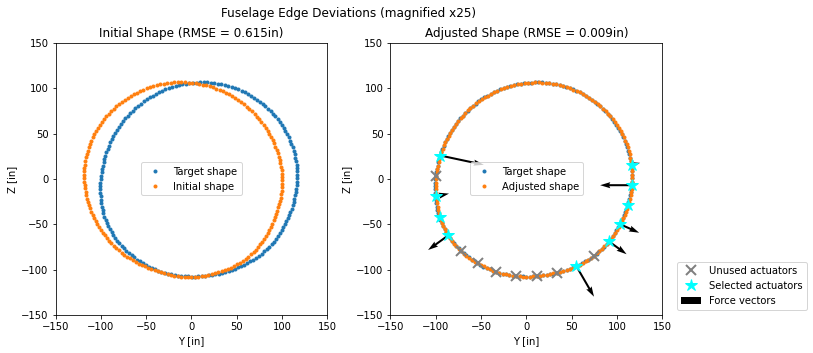

****************************** Episode: 2 ******************************
reward: 0.7110448999865386 final error: 0.014335945229592069


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3B807F0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3B80AF0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


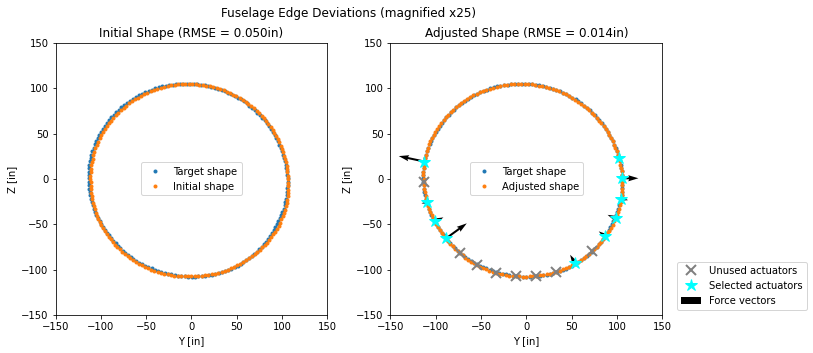

****************************** Episode: 3 ******************************
reward: 0.9923393685099882 final error: 0.013870841413152403


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A351D720> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A351DA20> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


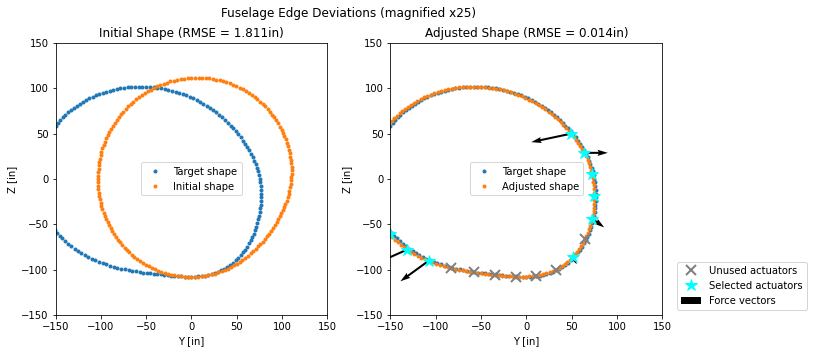

****************************** Episode: 4 ******************************
reward: 0.9813704403059115 final error: 0.01211670027568336


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3972740> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3972A40> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


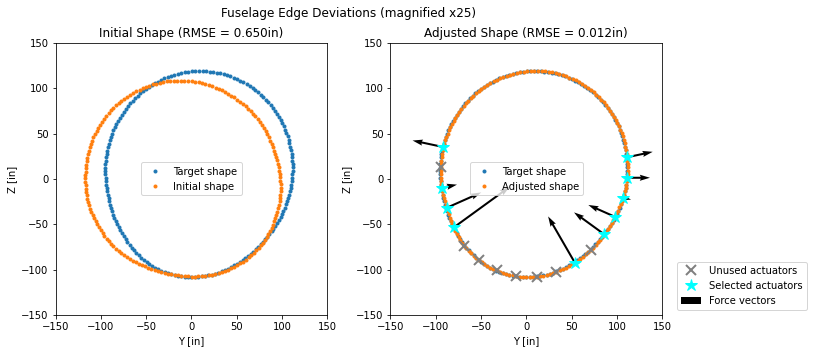

****************************** Episode: 5 ******************************
reward: 0.9856211344249397 final error: 0.008290078484641228


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3A475E0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3A478E0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


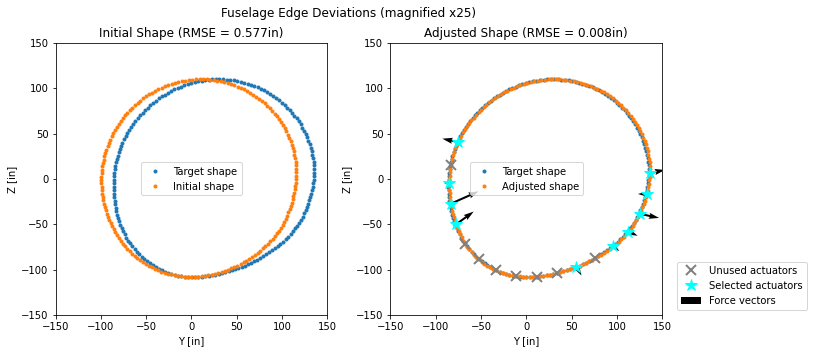

****************************** Episode: 6 ******************************
reward: 0.7442285645538274 final error: 0.00793479494336692


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A36F4580> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A36F4880> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


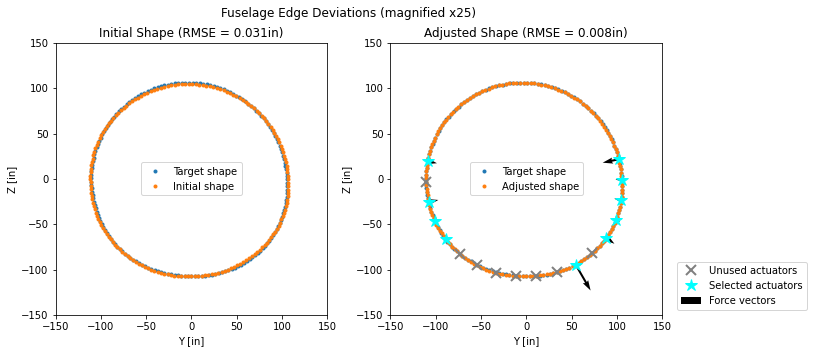

****************************** Episode: 7 ******************************
reward: 0.9881583977791218 final error: 0.010482070919282702


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3B3D420> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3B3D720> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


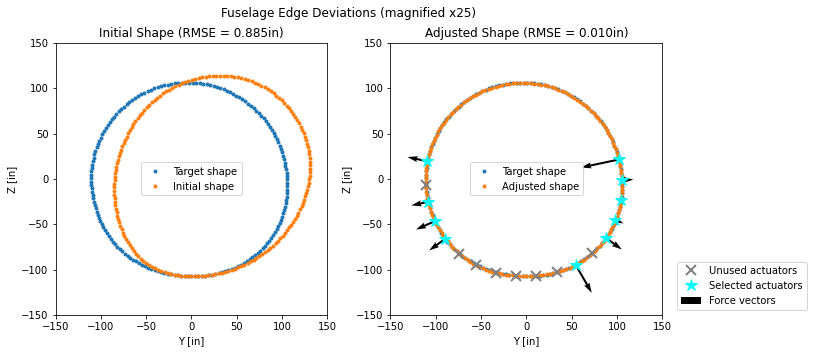

****************************** Episode: 8 ******************************
reward: 0.9900828945787272 final error: 0.011688096695872648


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140AE0BA260> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140AE0BA560> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


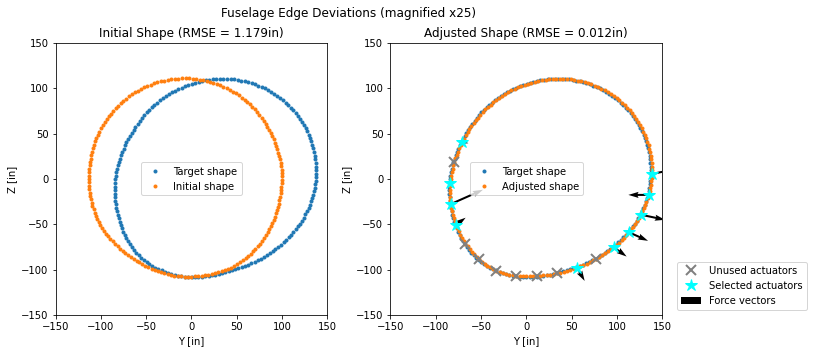

****************************** Episode: 9 ******************************
reward: 0.9724120671555642 final error: 0.012969821923912656


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140D88830A0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140D88833A0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


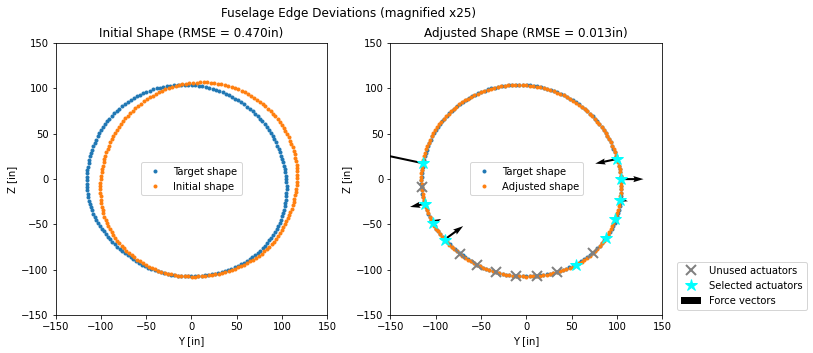

****************************** Episode: 10 ******************************
reward: 0.9566038295700146 final error: 0.010204902708685407


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000141396DBEE0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000014139700220> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


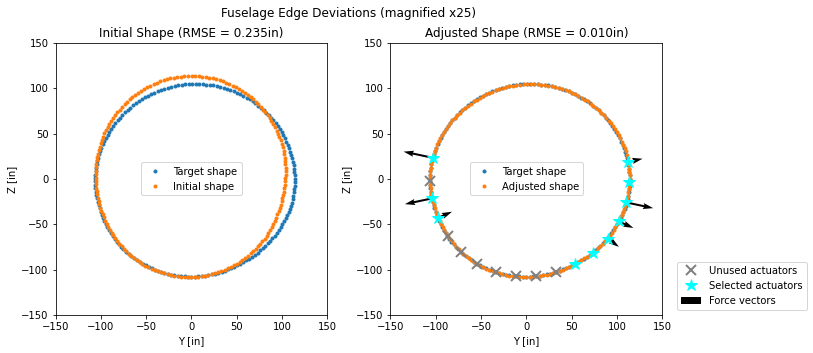

****************************** Episode: 11 ******************************
reward: 0.9875721151426863 final error: 0.01819845694834146


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001413B504D60> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001413B505060> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


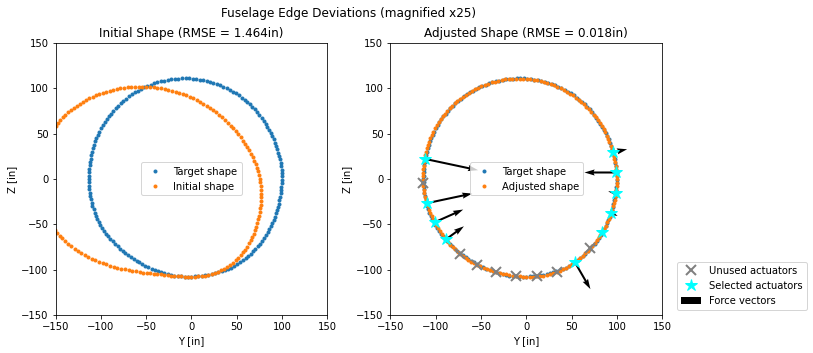

****************************** Episode: 12 ******************************
reward: 0.9867373059844952 final error: 0.0260585087358912


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000141397001C0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000141397007F0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


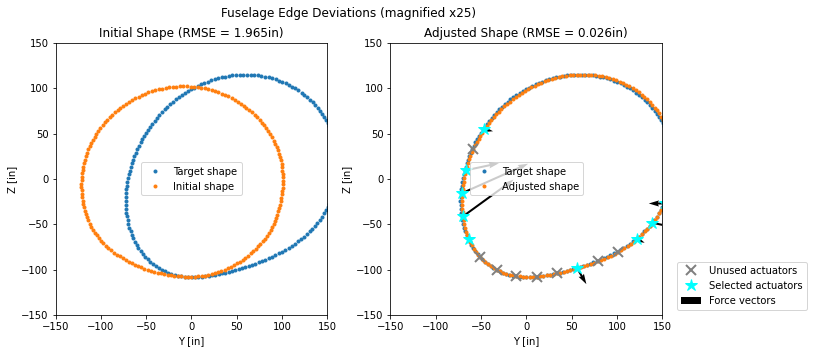

****************************** Episode: 13 ******************************
reward: 0.9662878170689497 final error: 0.011520817202817408


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3B58310> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3B58AC0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


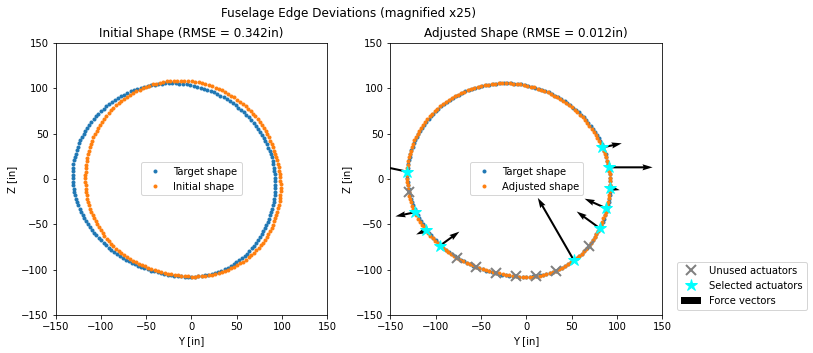

****************************** Episode: 14 ******************************
reward: 0.9809436053965603 final error: 0.010372254985977056


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A361CA00> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A361CC70> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


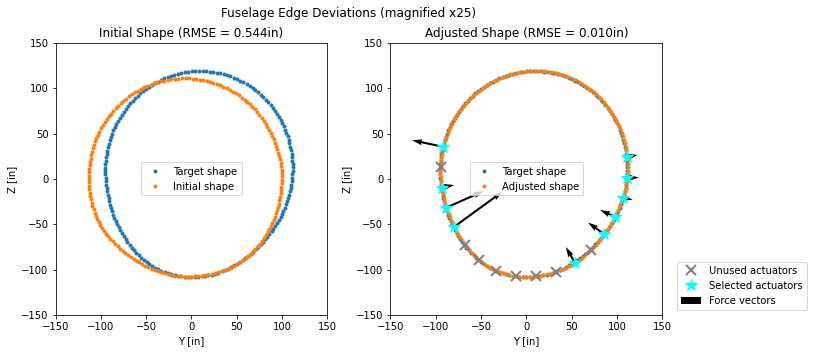

****************************** Episode: 15 ******************************
reward: 0.9820311275350386 final error: 0.01348401103970308


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A35412D0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A35425C0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


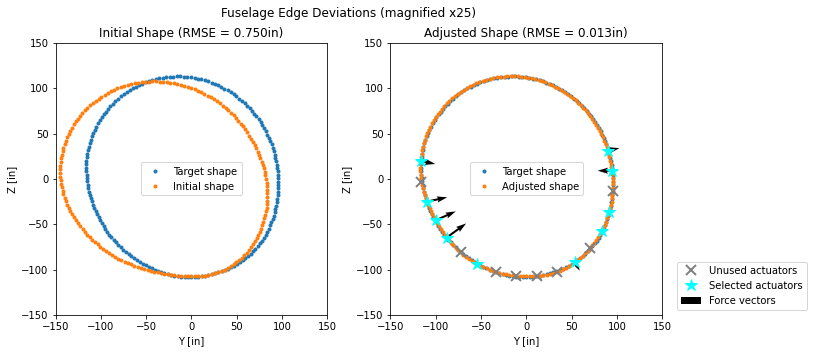

****************************** Episode: 16 ******************************
reward: 0.9890280430607077 final error: 0.018017409865509773


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3C8B700> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A2D75E40> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


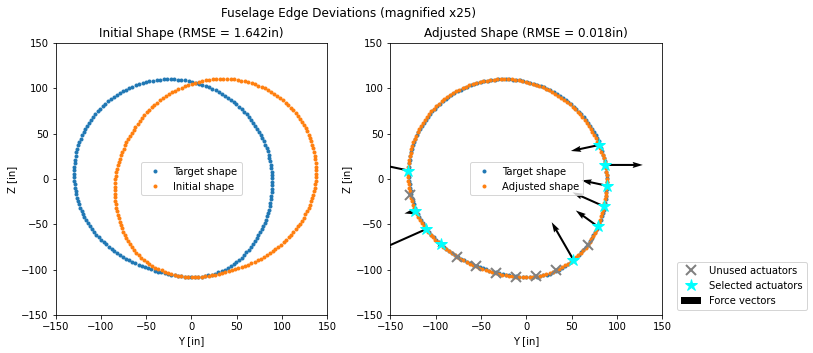

****************************** Episode: 17 ******************************
reward: 0.9869942156967695 final error: 0.019871006941475314


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A351D8D0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A351DC60> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


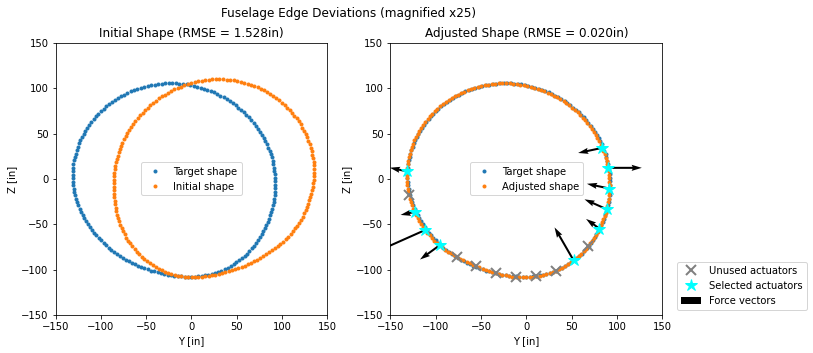

****************************** Episode: 18 ******************************
reward: 0.9866780095837941 final error: 0.017080743851011507


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3BBE2F0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3BBE5F0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


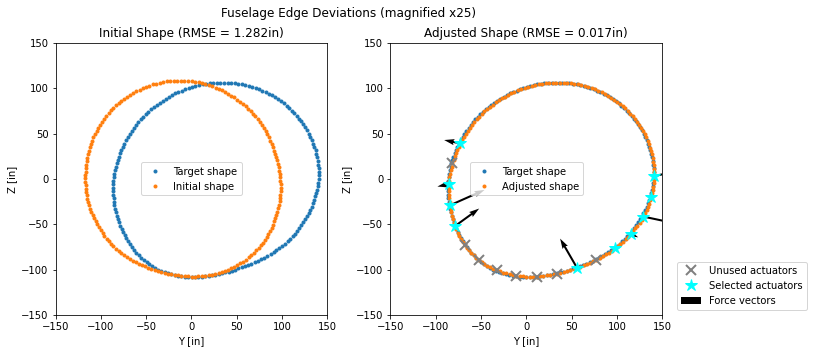

****************************** Episode: 19 ******************************
reward: 0.9849053034961903 final error: 0.014260891757203157


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3A93130> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3A925C0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


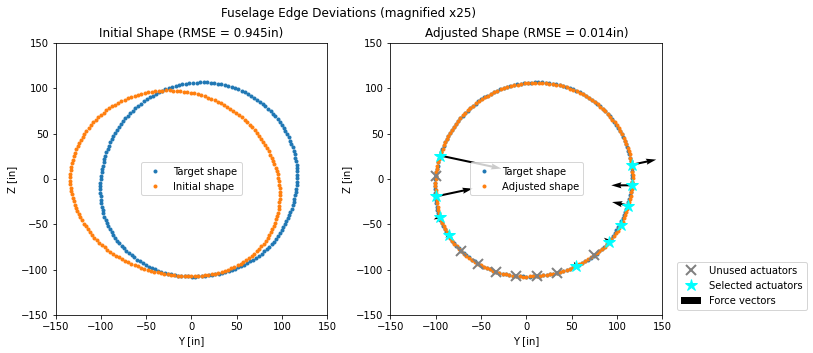

****************************** Episode: 20 ******************************
reward: 0.9794234493694965 final error: 0.013557581162620172


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3603F70> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A36A42B0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


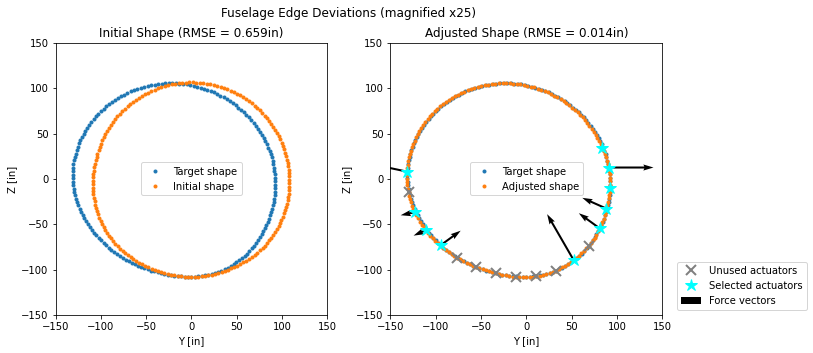

****************************** Episode: 21 ******************************
reward: 0.9889901546961625 final error: 0.01926486293137376


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A39F0DF0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A39F10F0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


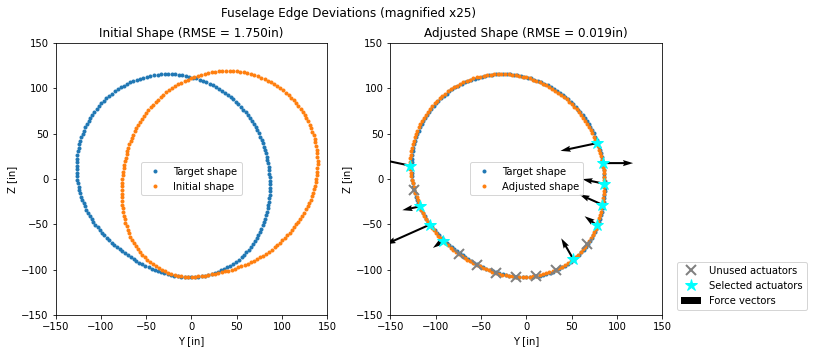

****************************** Episode: 22 ******************************
reward: 0.9854742167494914 final error: 0.011782455915561048


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001414D0A5C30> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001414D0A5F30> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


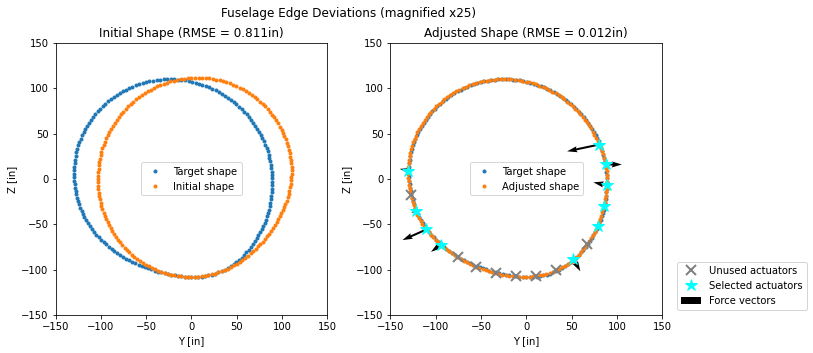

****************************** Episode: 23 ******************************
reward: 0.9421459093418731 final error: 0.012444629772772373


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A35CE800> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A35CE530> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


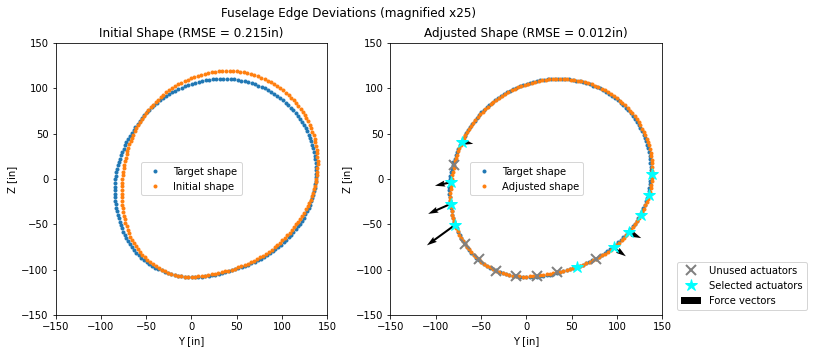

****************************** Episode: 24 ******************************
reward: 0.9903764926966445 final error: 0.016558151330527807


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3AF0EE0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3AF2AA0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


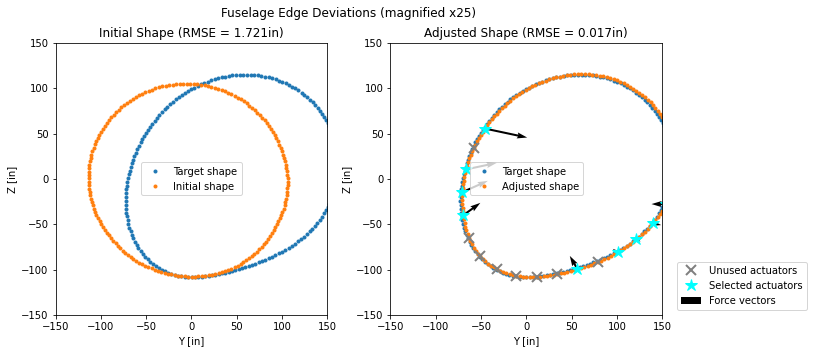

****************************** Episode: 25 ******************************
reward: 0.9894392639967613 final error: 0.018803140259827645


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3DF5750> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3DF5FF0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


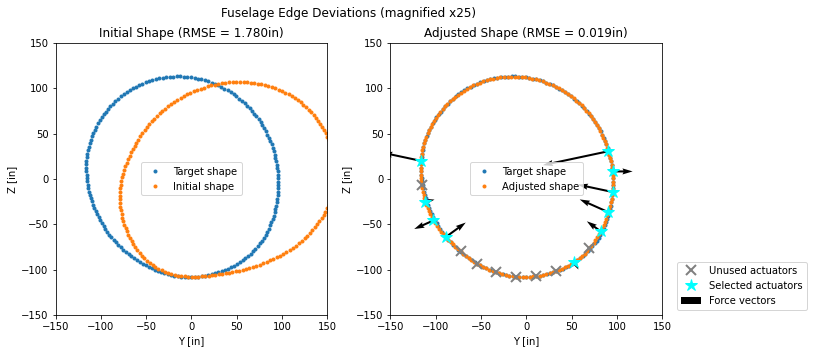

****************************** Episode: 26 ******************************
reward: 0.9307410664349532 final error: 0.012205831735352021


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3BA9390> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3BAB550> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


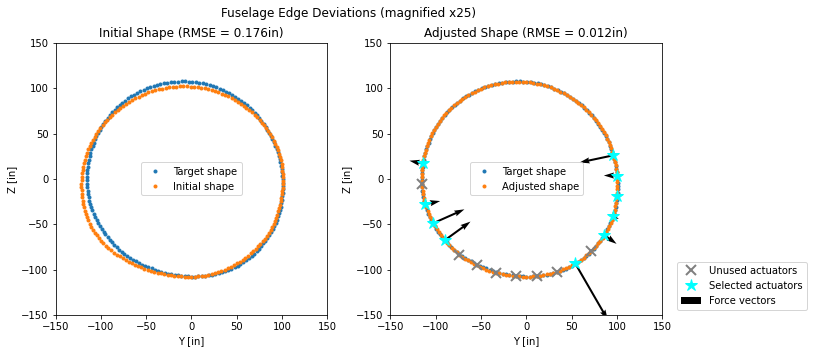

****************************** Episode: 27 ******************************
reward: 0.9827084744282256 final error: 0.02473002296699256


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3657070> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A36579A0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


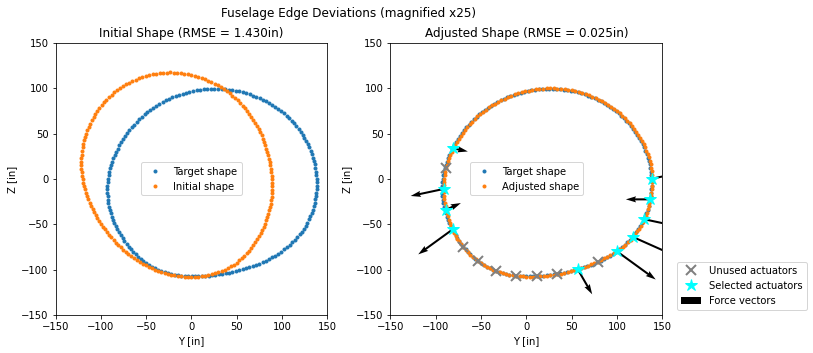

****************************** Episode: 28 ******************************
reward: 0.9859374102709599 final error: 0.018384775164639895


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001413B522E00> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001413B5226E0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


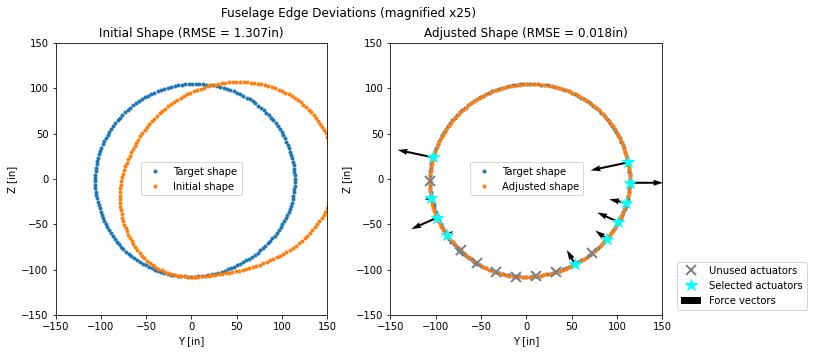

****************************** Episode: 29 ******************************
reward: 0.9905172484756988 final error: 0.010664151767229735


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001414D13A3E0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001414D13A6E0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


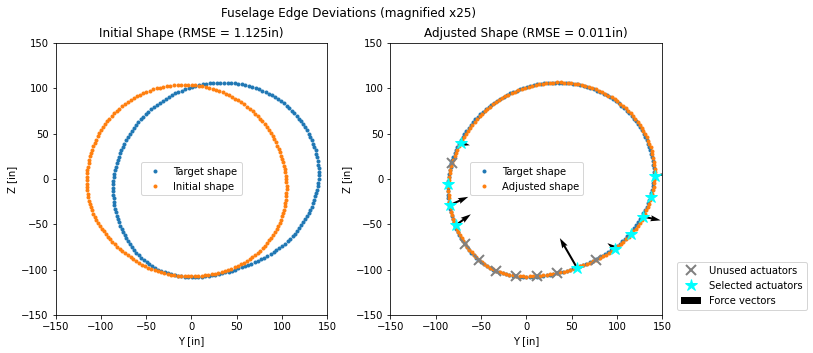

****************************** Episode: 30 ******************************
reward: 0.9701307819630587 final error: 0.010224620573757014


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3B915A0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3B90FA0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


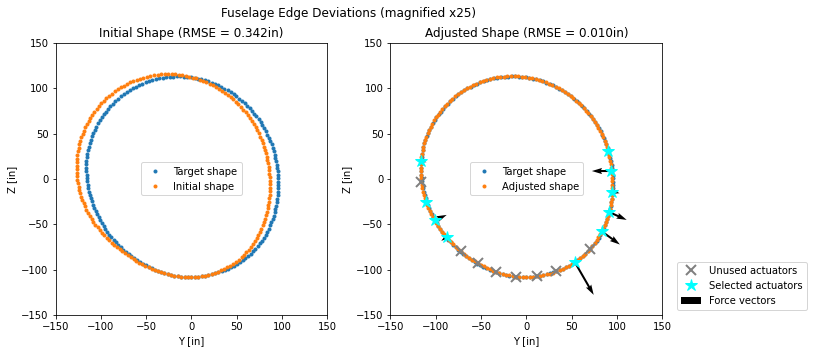

****************************** Episode: 31 ******************************
reward: 0.7110448999865386 final error: 0.014335945229592069


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140AE08C0A0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140AE08C3A0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


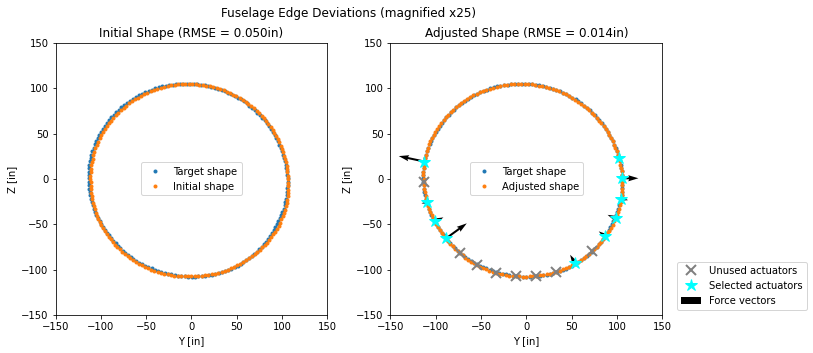

****************************** Episode: 32 ******************************
reward: 0.9872450067238492 final error: 0.018677449837798673


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000014139708F70> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000014139709270> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


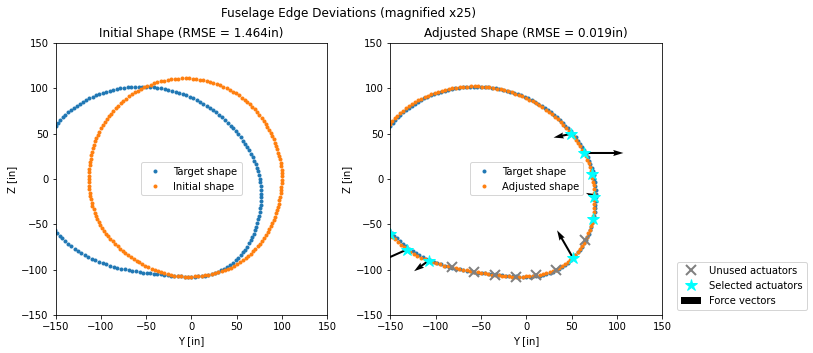

****************************** Episode: 33 ******************************
reward: 0.9901553580879817 final error: 0.014413866172298036


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140D8879E40> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140D887A140> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


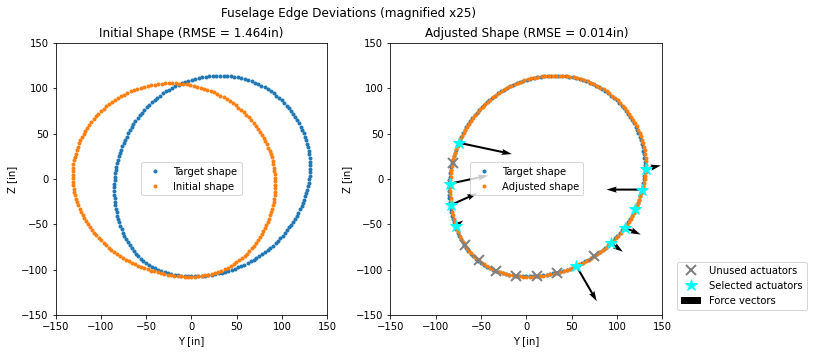

****************************** Episode: 34 ******************************
reward: 0.9863458495326999 final error: 0.01909771979487362


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001413B4D9CF0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001413B4DA2C0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


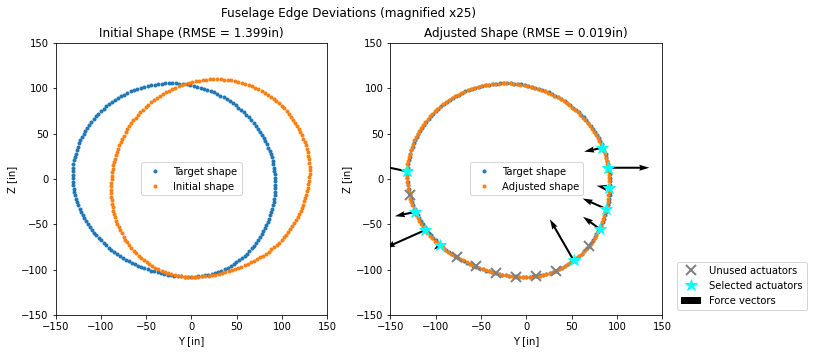

****************************** Episode: 35 ******************************
reward: 0.9893635371234552 final error: 0.018815753842657542


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3B95330> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3B95EA0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


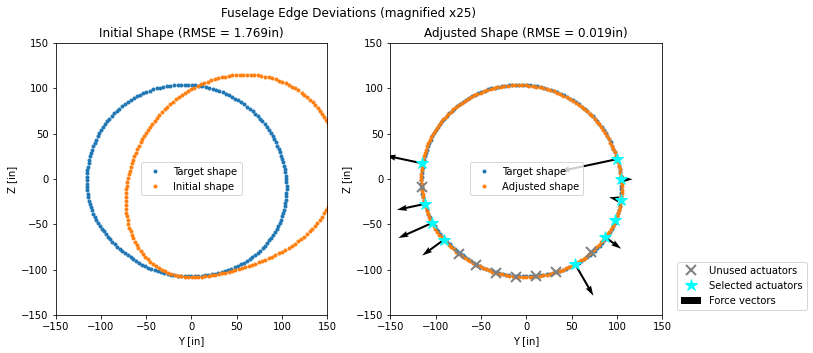

****************************** Episode: 36 ******************************
reward: 0.9812030932321024 final error: 0.016963642295904396


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A36A3FA0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A36A0C10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


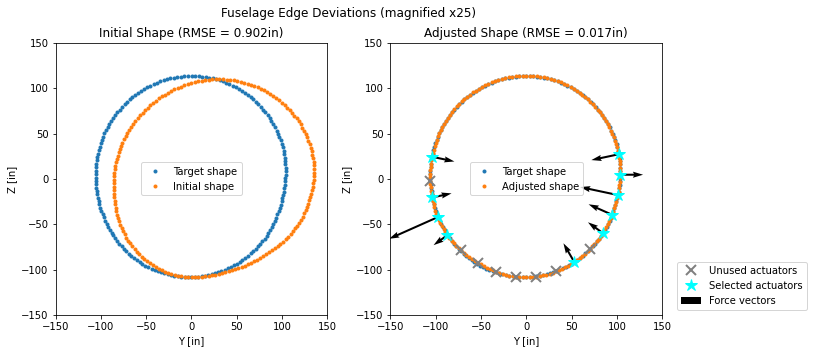

****************************** Episode: 37 ******************************
reward: 0.9883147706819073 final error: 0.011145791701493303


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3BEEE60> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3BEE500> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


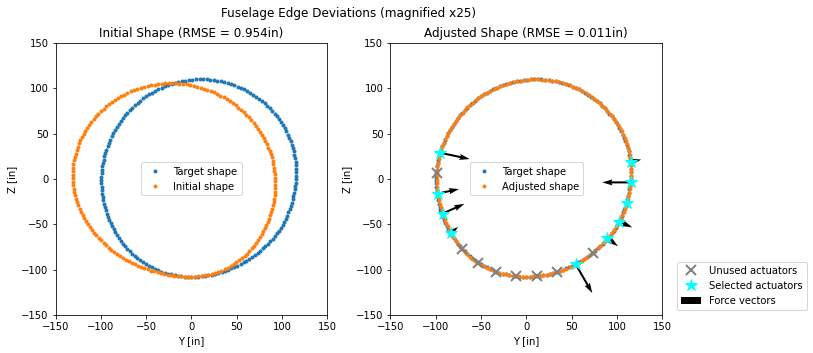

****************************** Episode: 38 ******************************
reward: 0.94204879925611 final error: 0.012704754335301943


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A2E3A380> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A2E38B50> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


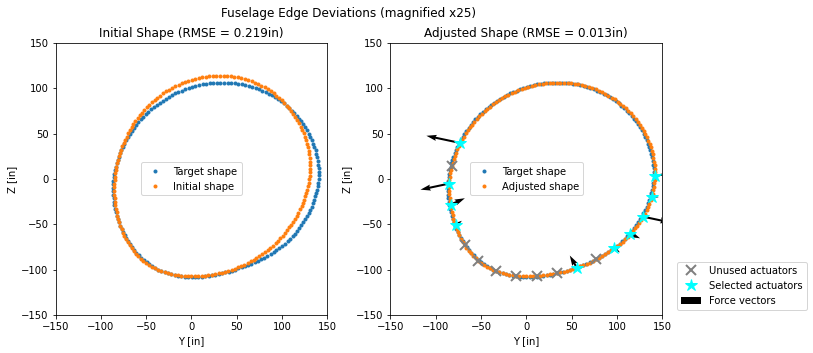

****************************** Episode: 39 ******************************
reward: 0.9741947917737507 final error: 0.016475030300107333


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140AE08E770> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140AE08E5C0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


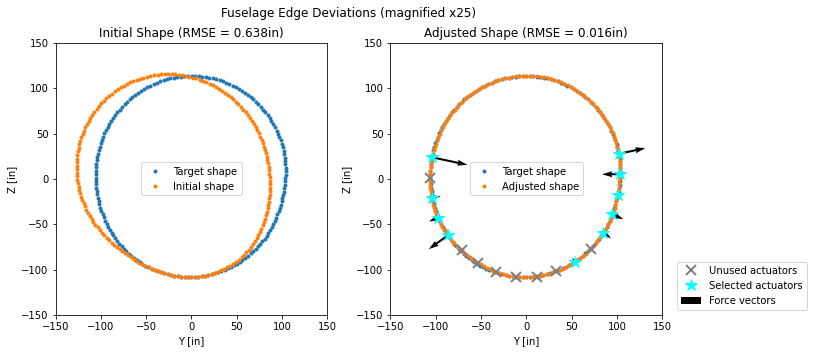

****************************** Episode: 40 ******************************
reward: 0.9878332812530011 final error: 0.01670251653452606


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A35CEDA0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A35CD8D0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


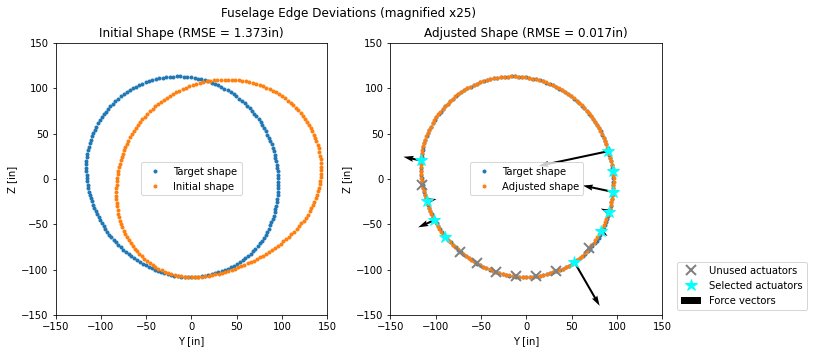

****************************** Episode: 41 ******************************
reward: 0.9849339406552873 final error: 0.030138502895255805


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A360F430> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A360F730> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


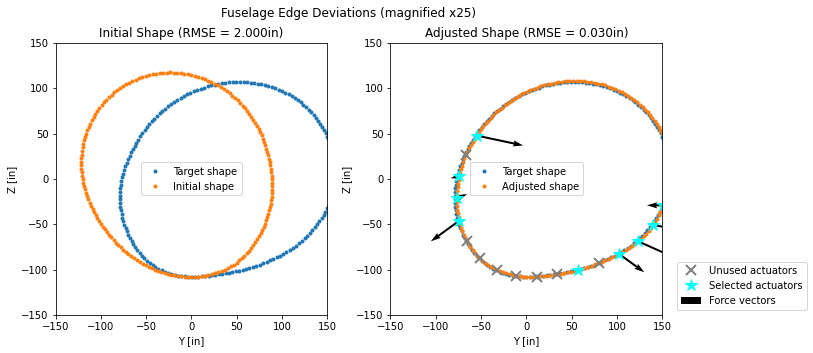

****************************** Episode: 42 ******************************
reward: 0.9891428240435517 final error: 0.020258010694609845


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A35502B0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A35505B0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


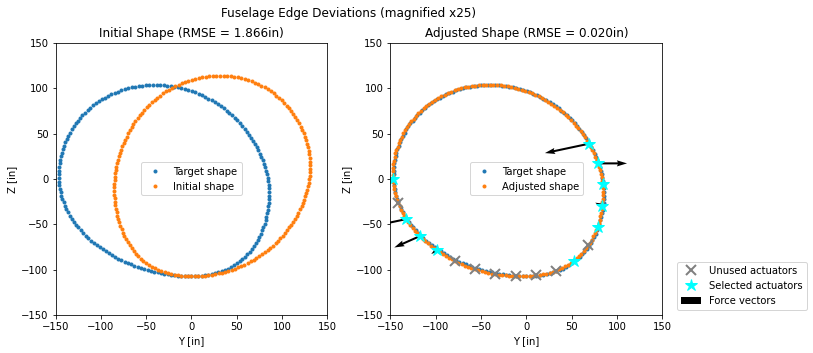

****************************** Episode: 43 ******************************
reward: 0.9891766335957884 final error: 0.008944535672914465


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3A0D0F0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3A0D3F0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


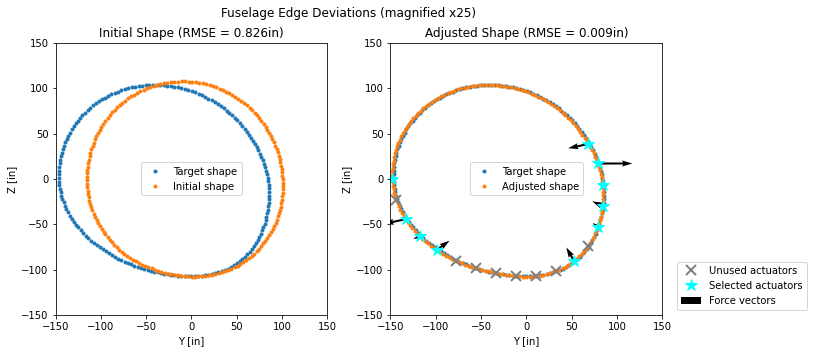

****************************** Episode: 44 ******************************
reward: 0.9877057062217228 final error: 0.015504928751432208


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001414D0B5F60> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001414D0B6260> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


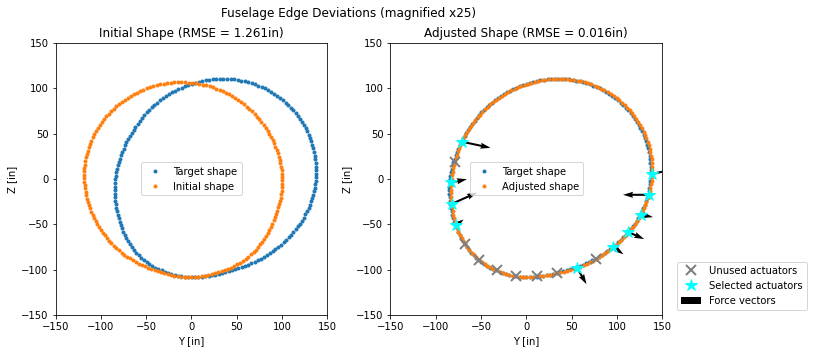

****************************** Episode: 45 ******************************
reward: 0.980560786760207 final error: 0.01215139479716019


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3A25B10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3A26CB0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


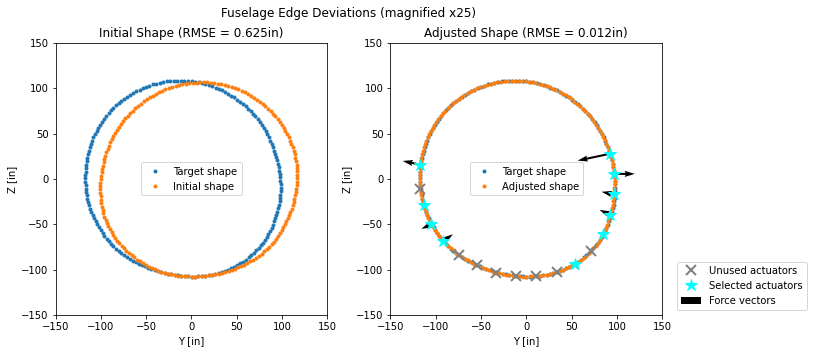

****************************** Episode: 46 ******************************
reward: 0.9621086303198539 final error: 0.015575332335984614


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3627130> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3627700> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


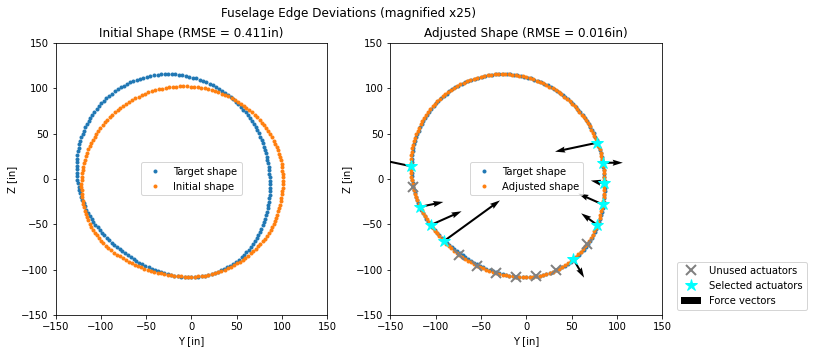

****************************** Episode: 47 ******************************
reward: 0.9724694718488223 final error: 0.005954159359010278


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001413B520820> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001413B5234C0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


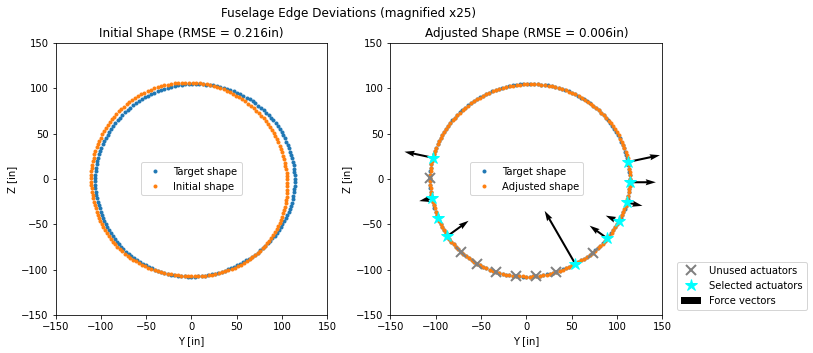

****************************** Episode: 48 ******************************
reward: 0.9593813118354031 final error: 0.015850552432048026


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3B808B0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3B82BC0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


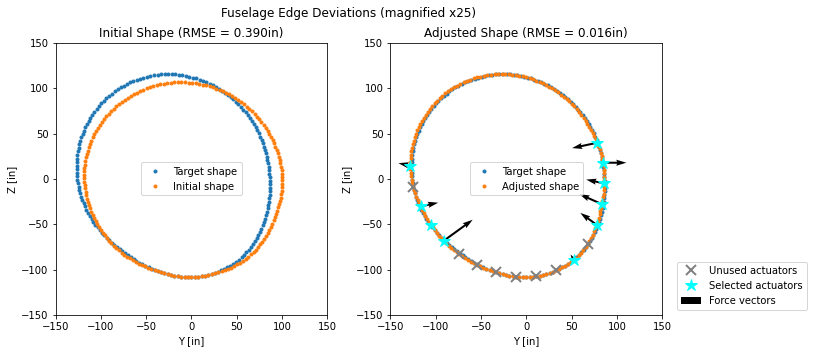

****************************** Episode: 49 ******************************
reward: 0.962887177205325 final error: 0.012356365333402064


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A39B8160> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A39BAB60> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


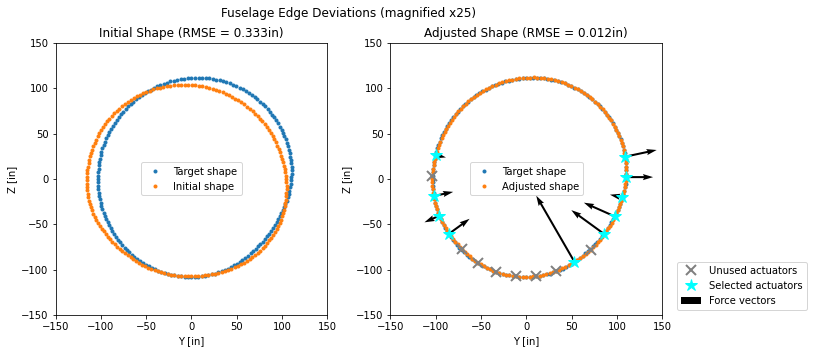

****************************** Episode: 50 ******************************
reward: 0.9915662425467853 final error: 0.013153988588709217


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000014139686980> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000014139684640> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


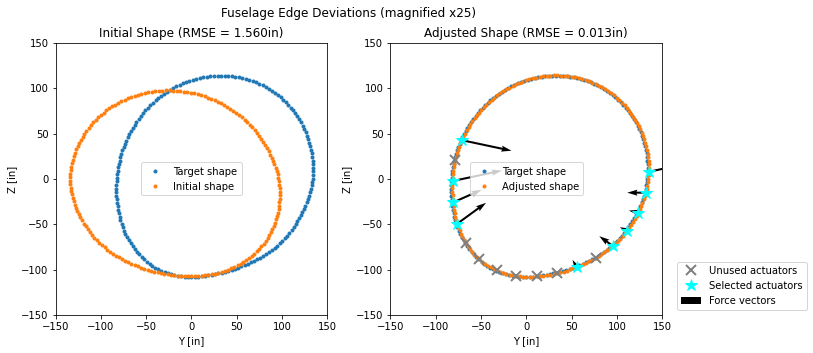

****************************** Episode: 51 ******************************
reward: 0.9898254503283628 final error: 0.02114547447807958


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A35C04F0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A35C2110> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


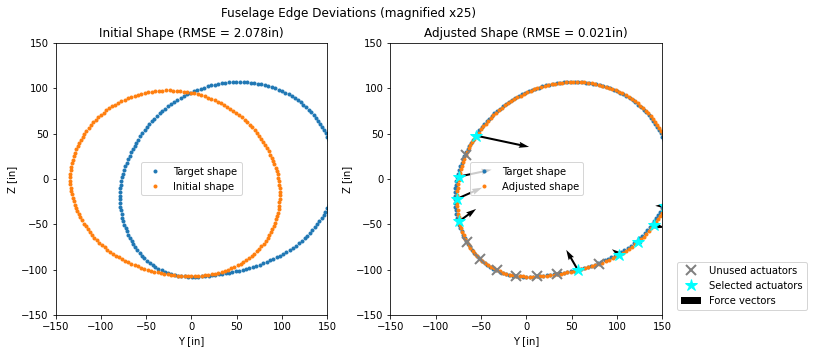

****************************** Episode: 52 ******************************
reward: 0.9853382146994525 final error: 0.008453194741407018


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A36A1DB0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A36A3A90> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


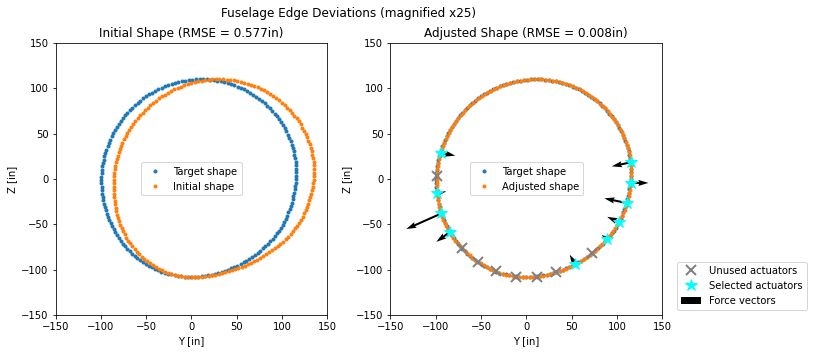

****************************** Episode: 53 ******************************
reward: 0.987206932292104 final error: 0.008444124579845207


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000014139740310> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000014139740610> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


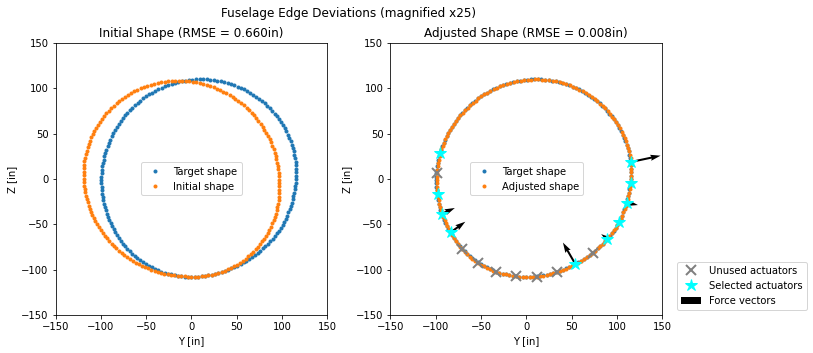

****************************** Episode: 54 ******************************
reward: 0.9388949333823557 final error: 0.009403128311790887


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140AE02D150> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140AE02D450> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


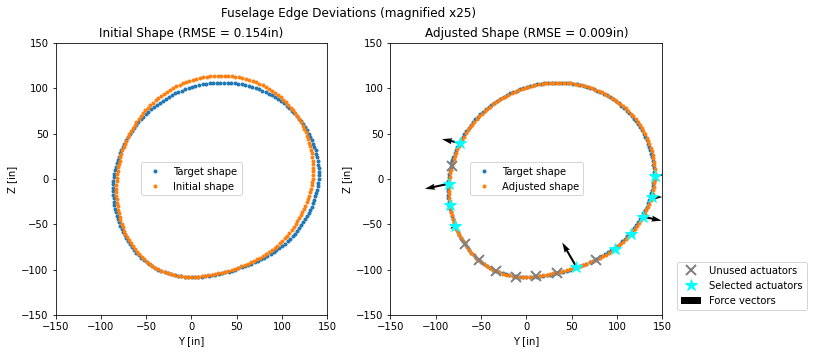

****************************** Episode: 55 ******************************
reward: 0.9728115562838878 final error: 0.013229928449441907


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001413B4A9F90> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001413B4AA290> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


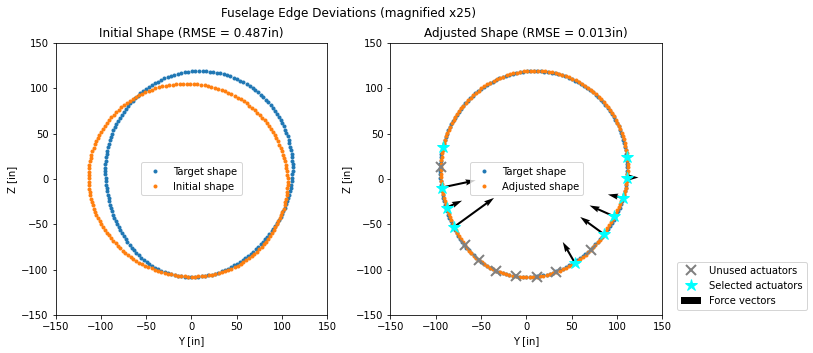

****************************** Episode: 56 ******************************
reward: 0.9701307819630587 final error: 0.010224620573757014


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000141396FA320> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000141396FABC0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


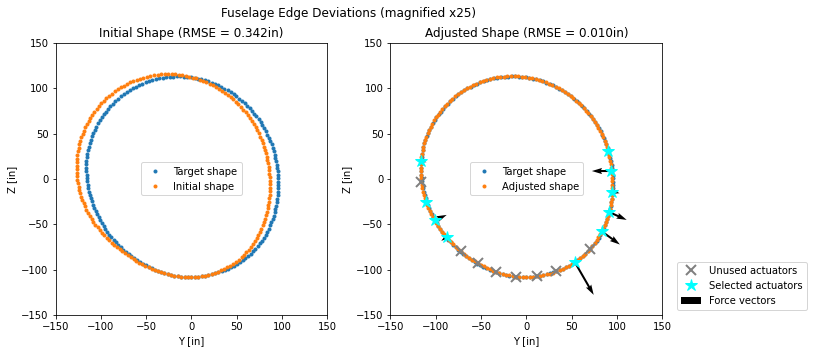

****************************** Episode: 57 ******************************
reward: 0.9478782919911845 final error: 0.010932248079815457


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3BEF1F0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3BEDF90> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


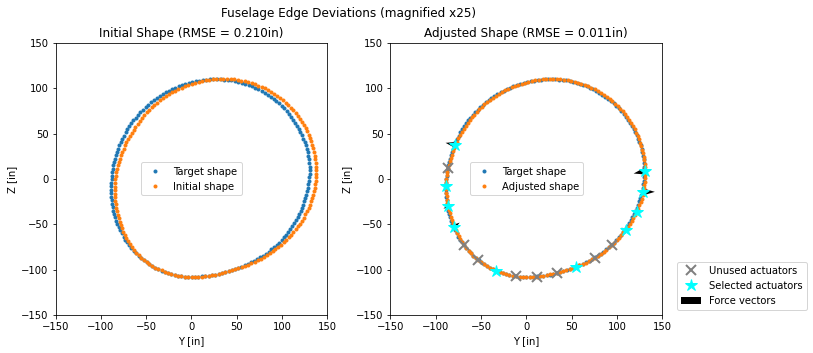

****************************** Episode: 58 ******************************
reward: 0.9773907334208992 final error: 0.009529566464603768


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3540DC0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3543160> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


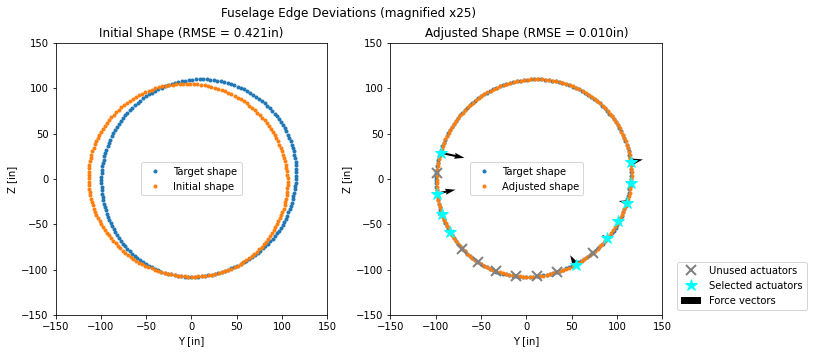

****************************** Episode: 59 ******************************
reward: 0.9912182225792667 final error: 0.020105490573320162


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3A7A230> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3A7BA00> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


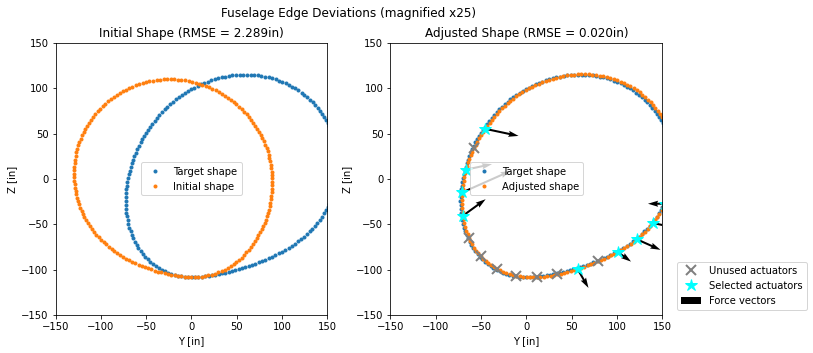

****************************** Episode: 60 ******************************
reward: 0.9912171204802139 final error: 0.014754685351001605


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3E20400> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A2C2AB30> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


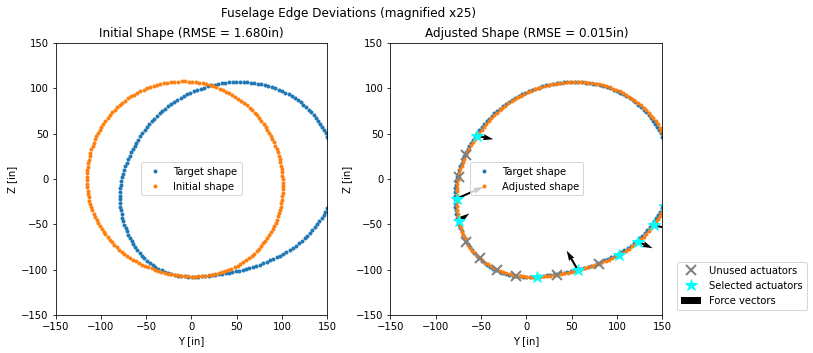

****************************** Episode: 61 ******************************
reward: 0.9868200302011388 final error: 0.01343667370058126


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3B0E440> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3B0F460> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


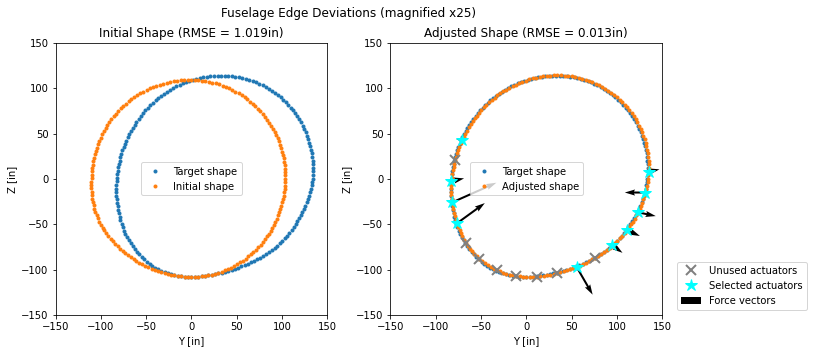

****************************** Episode: 62 ******************************
reward: 0.9530214135822647 final error: 0.01130861192298807


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000014139684EB0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000014139687A00> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


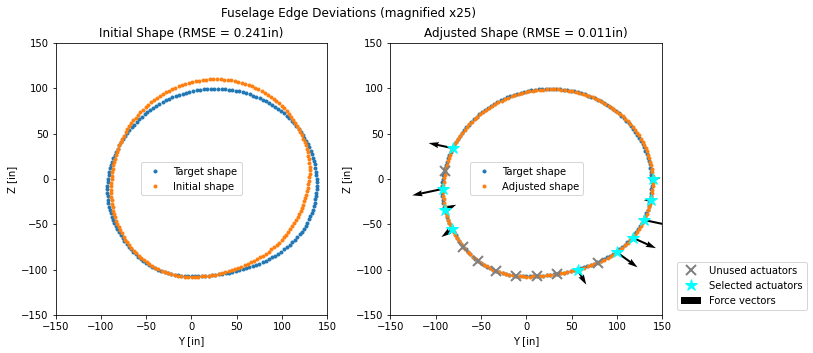

****************************** Episode: 63 ******************************
reward: 0.9911529817952055 final error: 0.015511784825863337


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140D88CB4F0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140D88CB7F0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


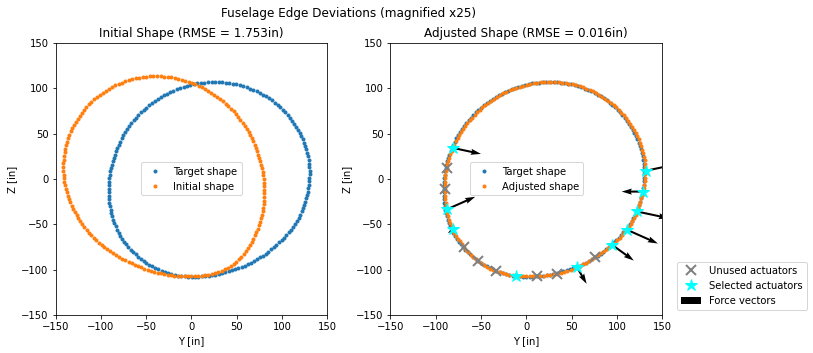

****************************** Episode: 64 ******************************
reward: 0.9891185427646404 final error: 0.02900410334278388


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3A60370> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3A60670> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


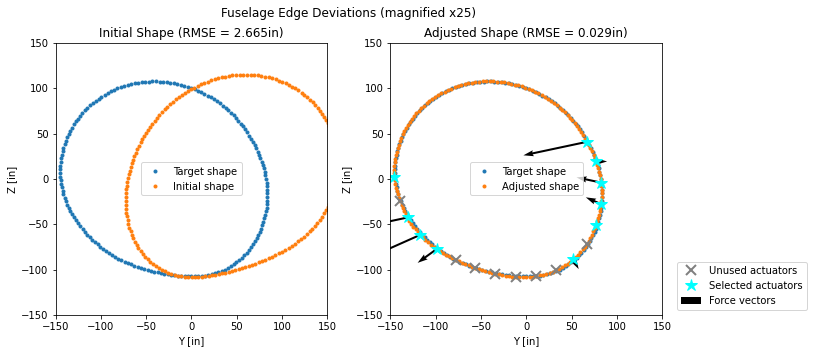

****************************** Episode: 65 ******************************
reward: 0.9605183148689934 final error: 0.009776079475701478


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A35ED240> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A35ED540> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


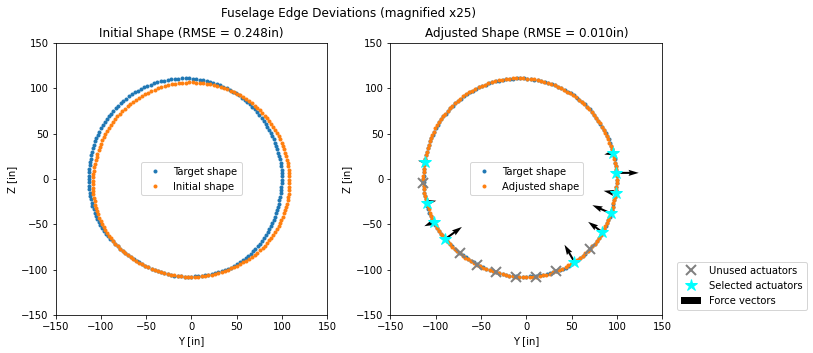

****************************** Episode: 66 ******************************
reward: 0.9777947785853525 final error: 0.015927279663663144


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001414D07A080> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001414D07A380> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


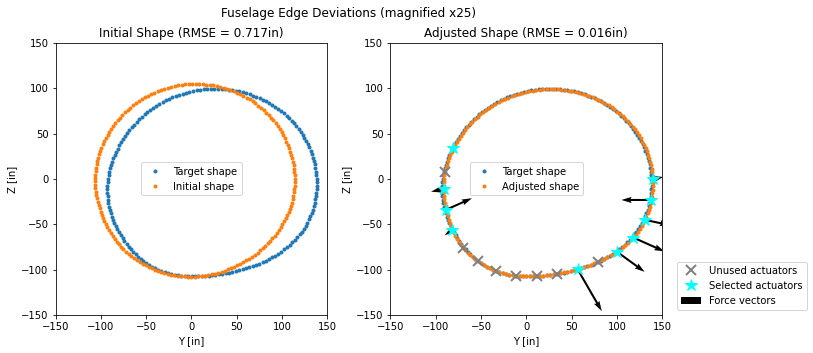

****************************** Episode: 67 ******************************
reward: 0.9599298856647915 final error: 0.012319279524263298


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3B4DCC0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3B4EC50> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


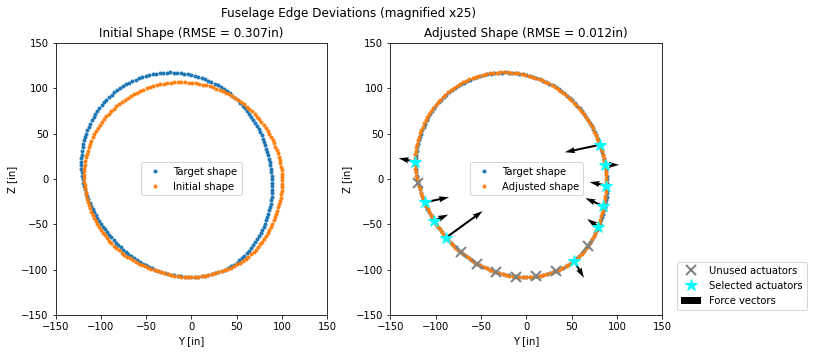

****************************** Episode: 68 ******************************
reward: 0.9732038515074611 final error: 0.014582459034613563


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001413B521300> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001413B523C70> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


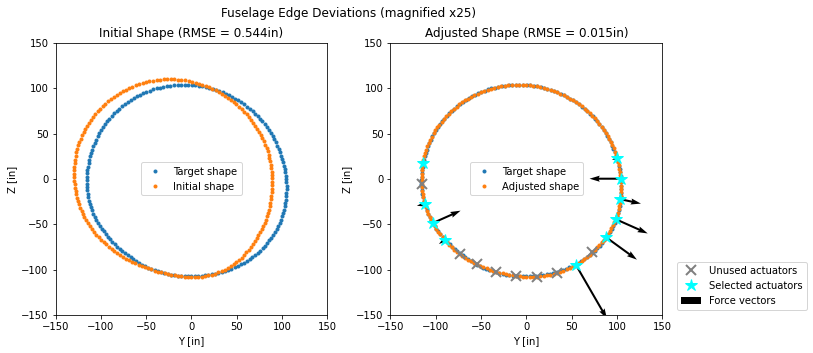

****************************** Episode: 69 ******************************
reward: 0.9849822617286684 final error: 0.00604720394017618


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3DF4EB0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3DF5C90> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


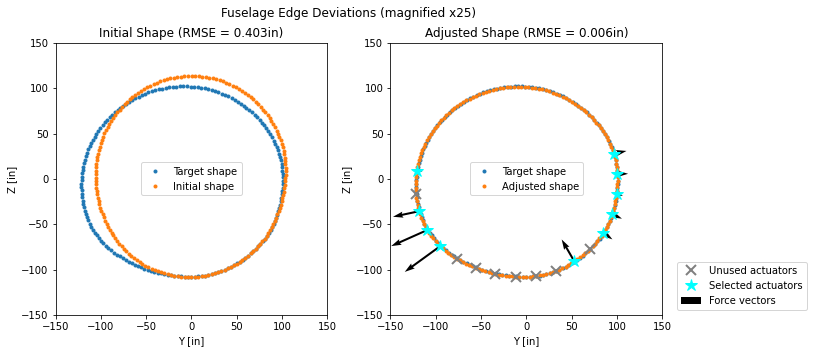

****************************** Episode: 70 ******************************
reward: 0.9885052675490946 final error: 0.00979978335771375


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3657220> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3657A60> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


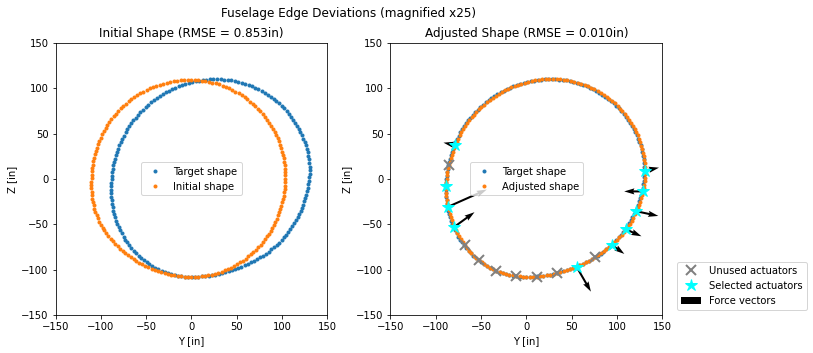

****************************** Episode: 71 ******************************
reward: 0.9832195739830456 final error: 0.007801287795169372


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3BD1390> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A39998D0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


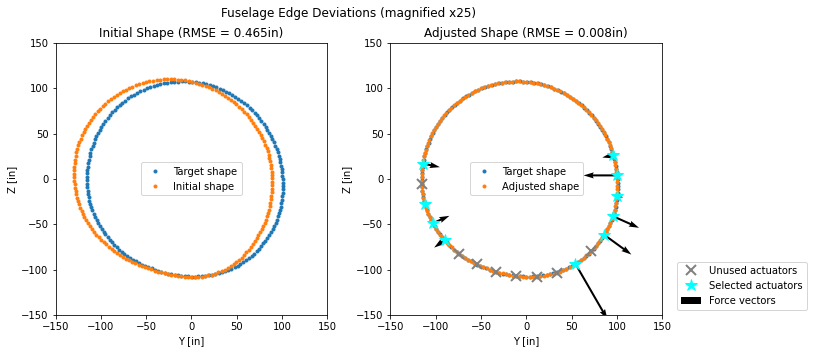

****************************** Episode: 72 ******************************
reward: 0.9790962839309546 final error: 0.010851143951430692


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A2D983D0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A2D9B580> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


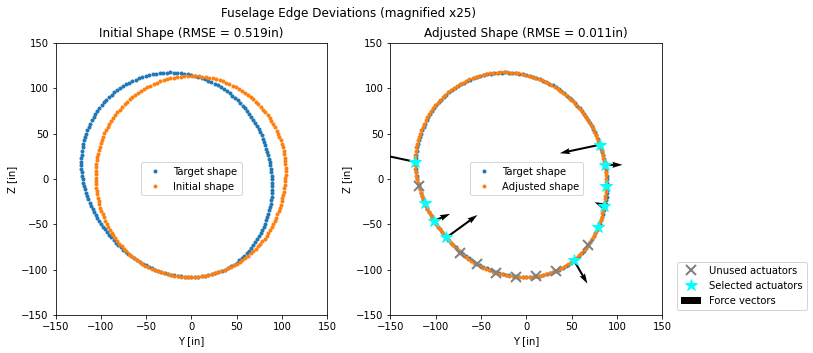

****************************** Episode: 73 ******************************
reward: 0.9643993837418828 final error: 0.02233813842435391


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A35EC2B0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A35ECFA0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


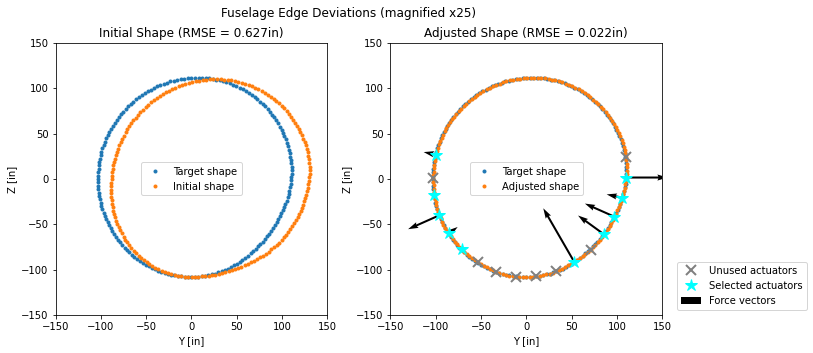

****************************** Episode: 74 ******************************
reward: 0.9643731593447574 final error: 0.01402483466026406


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3A7A8F0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3A7A2C0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


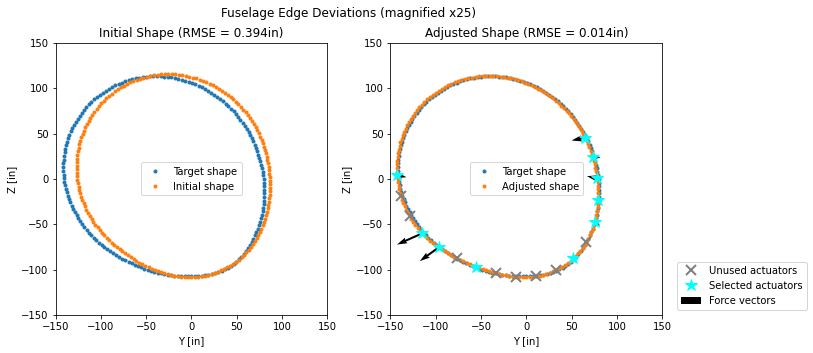

****************************** Episode: 75 ******************************
reward: 0.9878726543645101 final error: 0.012759169625142881


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000141396EC430> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000141396EC730> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


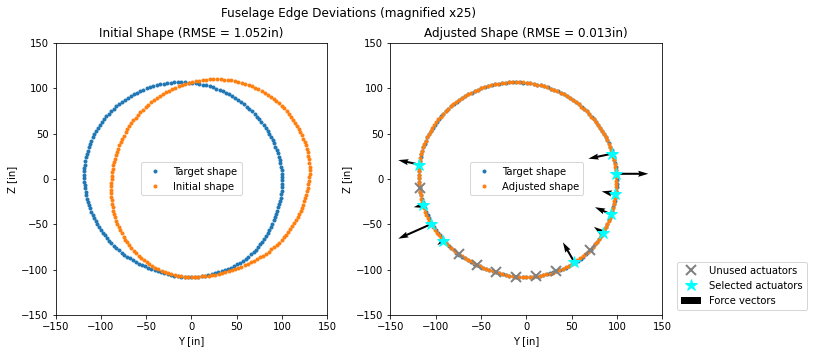

****************************** Episode: 76 ******************************
reward: 0.887612517516084 final error: 0.013719174281111721


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140D88412A0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140D88415A0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


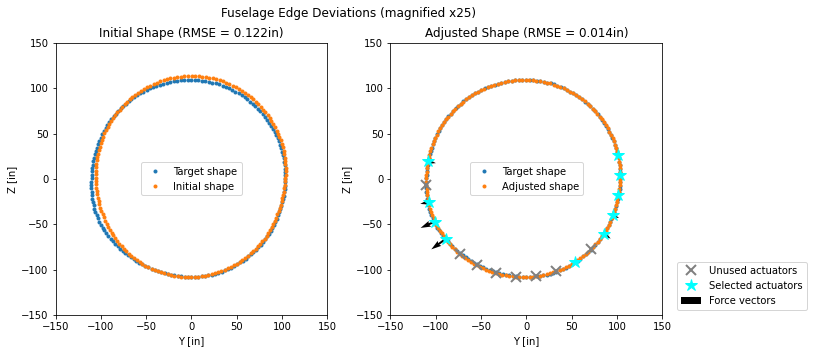

****************************** Episode: 77 ******************************
reward: 0.9891766335957884 final error: 0.008944535672914465


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001413B52E110> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001413B52E410> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


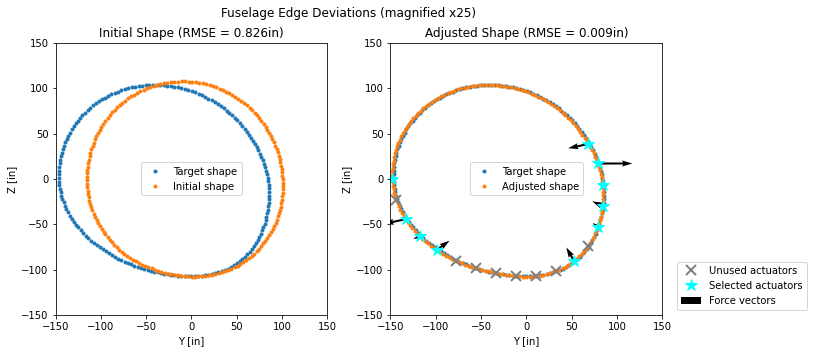

****************************** Episode: 78 ******************************
reward: 0.9880352857499358 final error: 0.012705039048899714


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000014139661D20> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000014139662F50> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


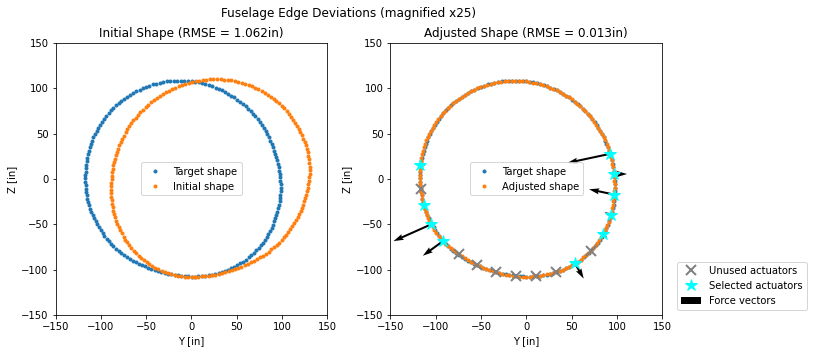

****************************** Episode: 79 ******************************
reward: 0.9869142960285523 final error: 0.011400849057089851


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3B0EEF0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3B0EAA0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


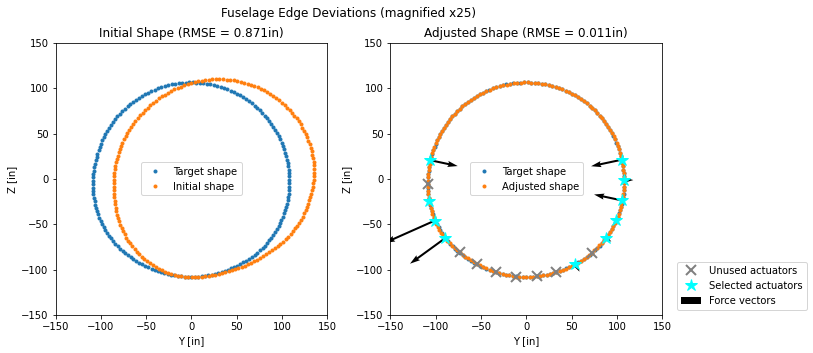

****************************** Episode: 80 ******************************
reward: 0.9455519573693509 final error: 0.007112412209132982


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A35CD360> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A35CDB70> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


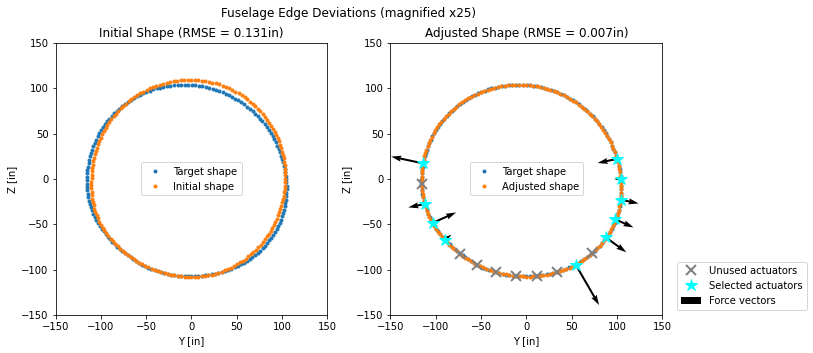

****************************** Episode: 81 ******************************
reward: 0.9912187072586994 final error: 0.017707864232044755


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A399B370> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A399BE20> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


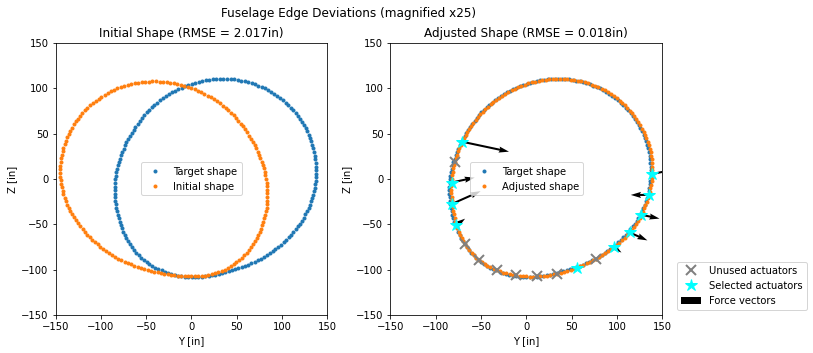

****************************** Episode: 82 ******************************
reward: 0.9808557441396268 final error: 0.010331426401778084


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A36CA710> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A36C93C0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


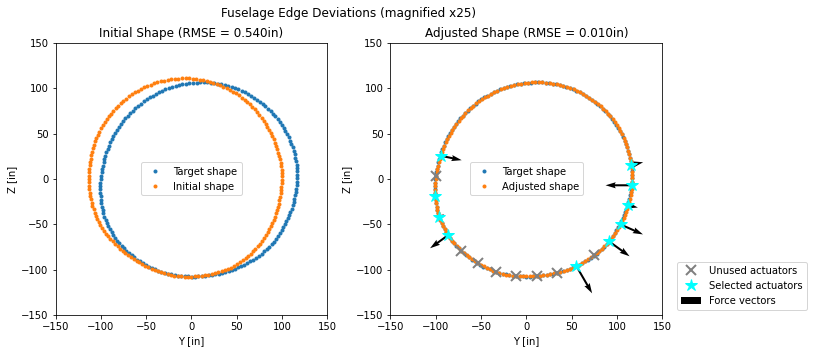

****************************** Episode: 83 ******************************
reward: 0.9759663632971305 final error: 0.02895554108263826


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3B832E0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3B83B50> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


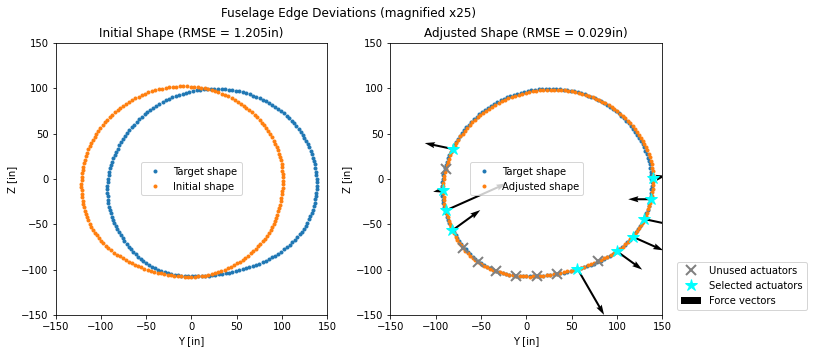

****************************** Episode: 84 ******************************
reward: 0.987103006090942 final error: 0.017020313513030464


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000141396EEF50> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000141396EF1C0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


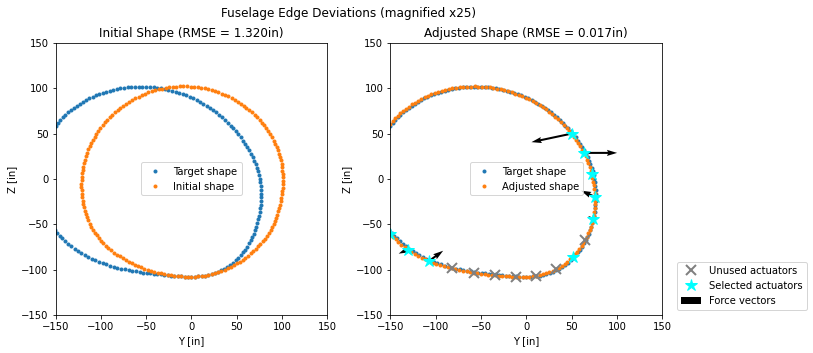

****************************** Episode: 85 ******************************
reward: 0.9886853455467502 final error: 0.0155702737453517


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A36A1BA0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A36A0910> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


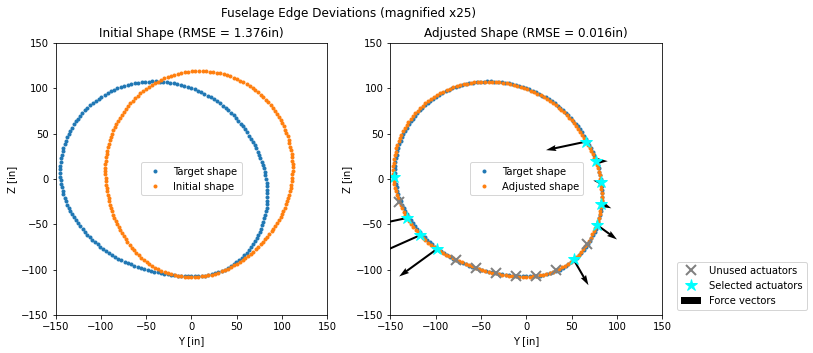

****************************** Episode: 86 ******************************
reward: 0.9863980529478775 final error: 0.014399990143545736


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A35BC4C0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A35BC7C0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


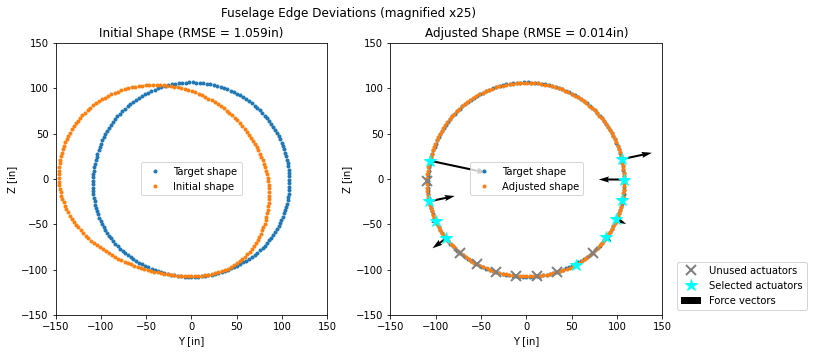

****************************** Episode: 87 ******************************
reward: 0.9854956151411612 final error: 0.0077147827380510655


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3BB9360> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3BB9660> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


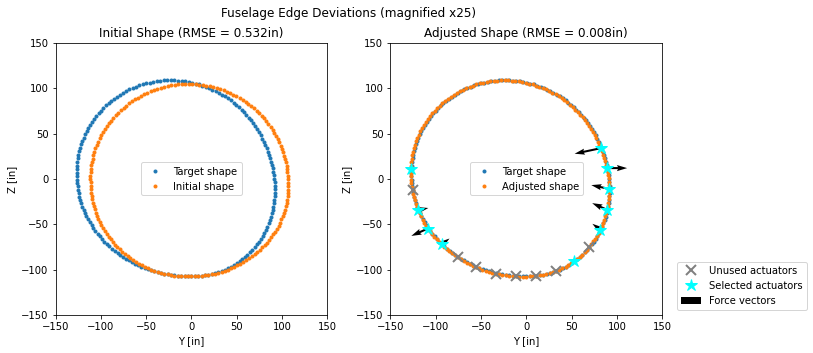

****************************** Episode: 88 ******************************
reward: 0.9653569223867601 final error: 0.010818532960629507


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001414D0821A0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001414D0824A0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


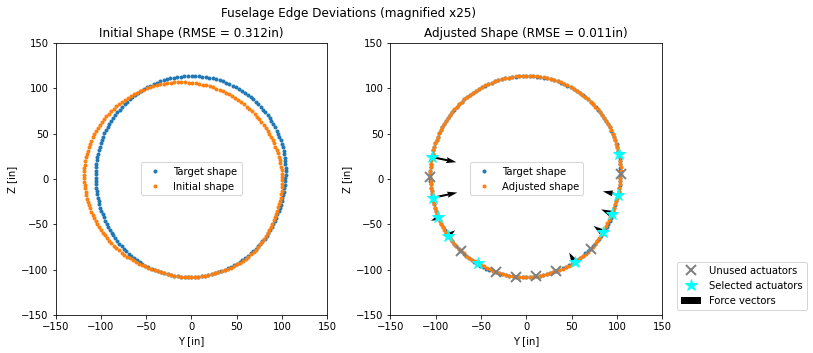

****************************** Episode: 89 ******************************
reward: 0.9726675069860622 final error: 0.00953844571480443


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3561DE0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3562D70> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


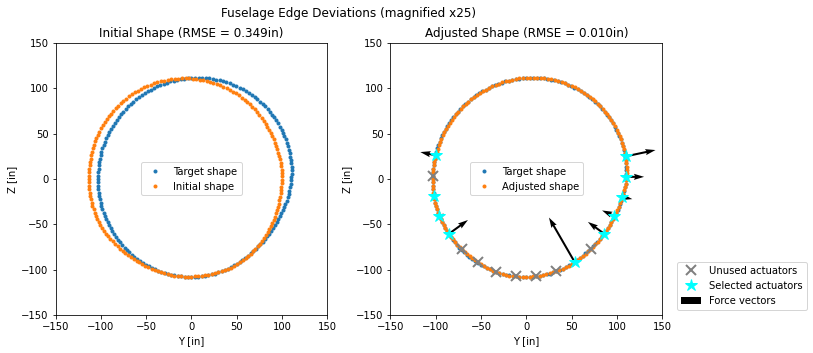

****************************** Episode: 90 ******************************
reward: 0.9796637135647148 final error: 0.010906560367332233


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3DF5C60> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3655AE0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


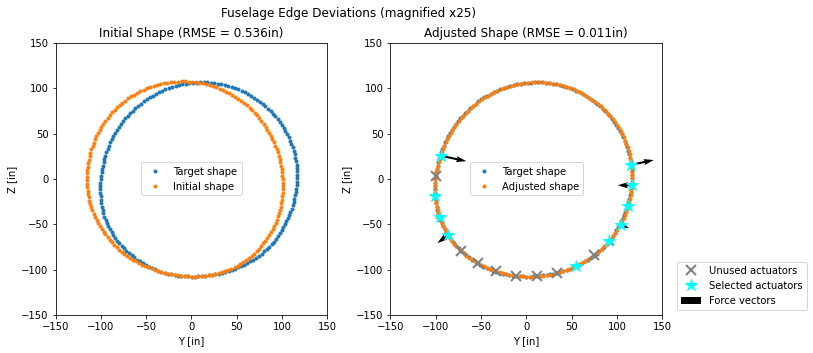

****************************** Episode: 91 ******************************
reward: 0.9815397243075308 final error: 0.012006597646164987


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A39BB0D0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A39BA3E0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


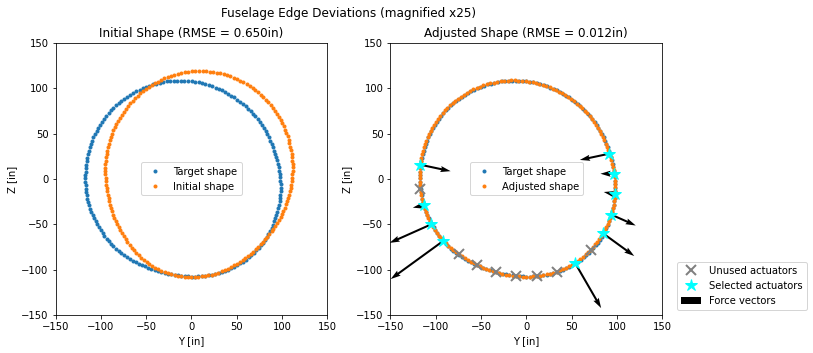

****************************** Episode: 92 ******************************
reward: 0.9893054869859851 final error: 0.013418949706447863


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3637430> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3634640> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


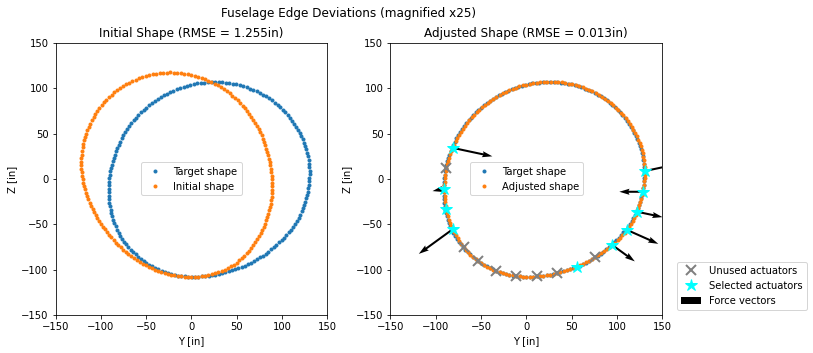

****************************** Episode: 93 ******************************
reward: 0.9869142960285523 final error: 0.011400849057089851


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001413B569930> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001413B56A980> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


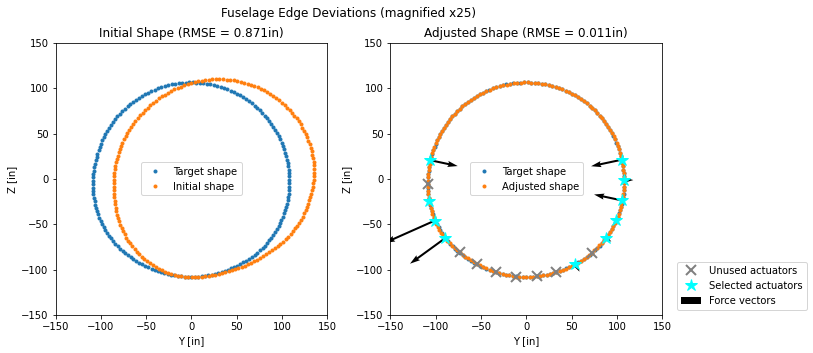

****************************** Episode: 94 ******************************
reward: 0.9865238663389095 final error: 0.012225023899617247


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000141589B7BE0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000141589B7D30> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


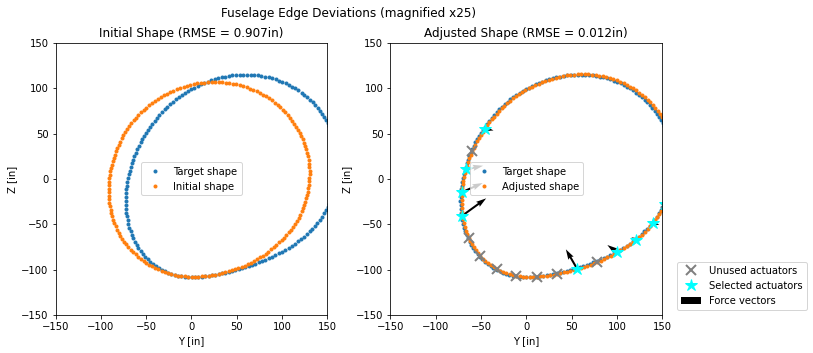

****************************** Episode: 95 ******************************
reward: 0.9849053034961903 final error: 0.014260891757203157


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3BBAFB0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A3BBA950> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


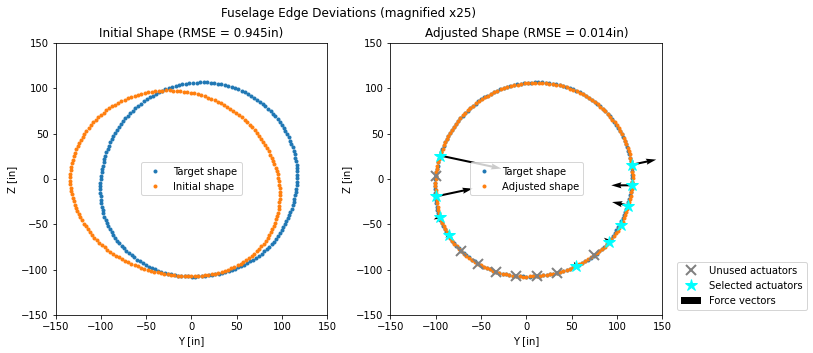

****************************** Episode: 96 ******************************
reward: 0.9804283828022684 final error: 0.015128348149439023


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A36C94E0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140A36CAC50> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


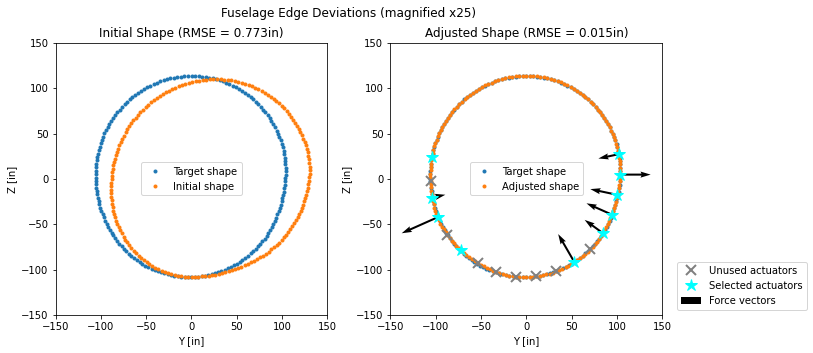

****************************** Episode: 97 ******************************
reward: 0.9911331464372901 final error: 0.017869312930355027


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140AE0A4550> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140AE0A4850> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


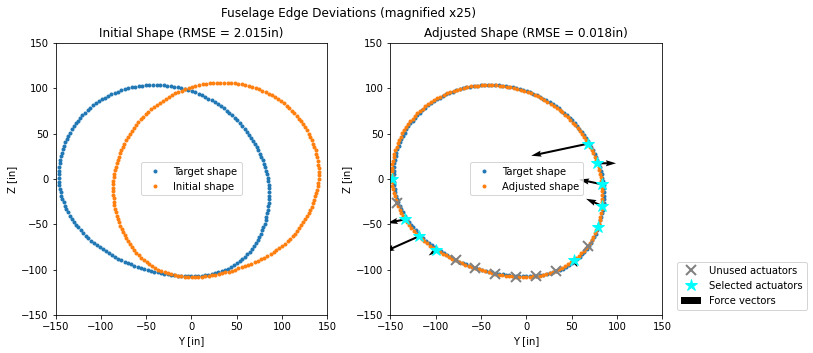

****************************** Episode: 98 ******************************
reward: 0.9885022159846404 final error: 0.016322972792936877


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000141396ED450> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000141396ED810> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


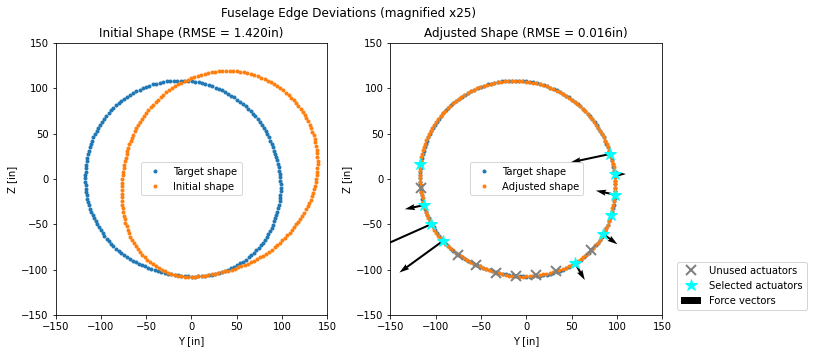

****************************** Episode: 99 ******************************
reward: 0.9665077887184252 final error: 0.008450866574431315


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001413B51A1D0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001413B51A4D0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


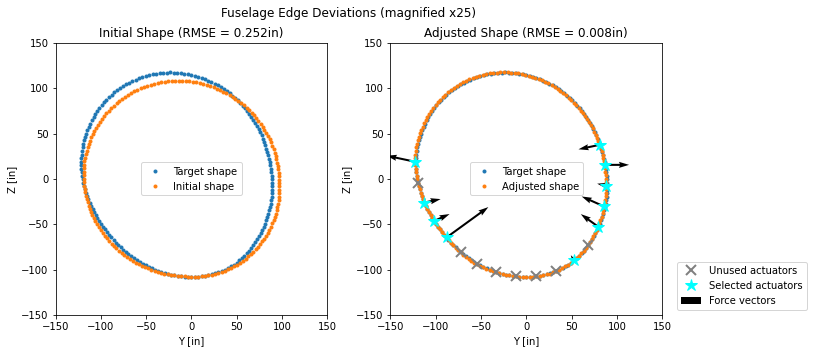

****************************** Episode: 100 ******************************
reward: 0.9895012503822581 final error: 0.01679099684405074


C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140AE0E5ED0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))
C:\Users\TL\AppData\Local\Temp\ipykernel_10352\644742652.py:183: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000140AE0E6830> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))


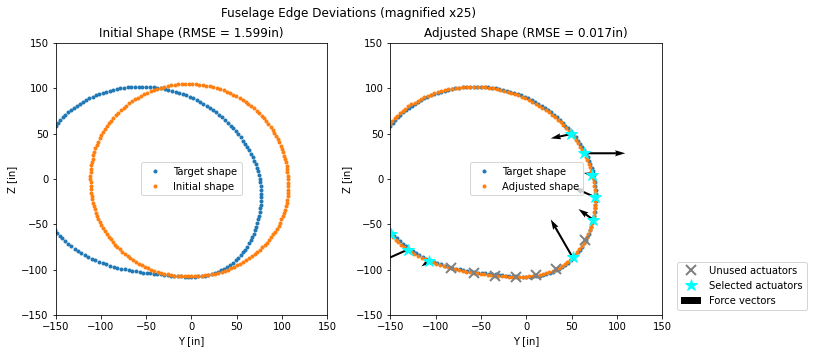

****************************** FINAL SUMMARY ******************************
**********************************************************
Inital error (mean) = 0.917
Initial error (median) = 0.819
Initial error (stdev) = 0.601
Final error (max) = 2.665
**********************************************************
Final error (mean) = 0.014
Final error (median) = 0.013
Final error (stdev) = 0.005
Final error (max) = 0.030
**********************************************************
Max Deviation (mean) = 0.044
Max Deviation (median) = 0.044
Max Deviation (stdev) = 0.013
Max Deviation (max) = 0.078
**********************************************************
Max Force (mean) = 258.972
Max Force (median) = 266.789
Max Force (stdev) = 79.055
Max Force (max) = 421.339


In [1]:
import os
from os import path
from AssemblyGym.envs import FuselageActuators
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import gym
import torch
from torch import nn
import torch.nn.functional as F
from torch.distributions.normal import Normal

from AssemblyGym.envs import FuselageActuators

def make_env(env_id, seed, idx,  n_actions, mode, record, file1, file2):
    def thunk():
        env = gym.make(env_id, n_actuators=n_actions, mode="File", record=record, seed=seed, port=50056+idx, file1=file1, file2=file2)
        #env = gym.wrappers.RecordEpisodeStatistics(env)
        return env

    return thunk

def layer_init(layer, std=np.sqrt(2), bias_const=0.0):
    torch.nn.init.orthogonal_(layer.weight, std)
    torch.nn.init.constant_(layer.bias, bias_const)
    return layer

class Agent(nn.Module):
    def __init__(self, envs):
        super().__init__()
        self.critic = nn.Sequential(
            layer_init(nn.Linear(np.array(envs.observation_space.shape).prod(), 64)),
            nn.Tanh(),
            layer_init(nn.Linear(64, 64)),
            nn.Tanh(),
            layer_init(nn.Linear(64, 1), std=1.0),
        )
        # layers for self.actor_mean
        self.fc1 = layer_init(nn.Linear(np.array(envs.observation_space.shape).prod(), 64))
        self.fc2 = layer_init(nn.Linear(64, 64))
        self.fc3 = layer_init(nn.Linear(64, np.prod(envs.action_space.shape)), std=0.01)
        
        self.actor_logstd = nn.Parameter(-5*torch.ones(1, np.prod(envs.action_space.shape)), requires_grad=False)  # initial action_std = exp(actor_logstd)

    def get_value(self, obs):
        return self.critic(obs)

    def get_action_and_value(self, obs, action=None, scaleStd=1):
        # Start with standard MLP
        x = torch.tanh(self.fc1(obs))
        x = torch.tanh(self.fc2(x))
        action_mean = torch.tanh(self.fc3(x))
        # Build action distribution
        action_logstd = self.actor_logstd#.expand_as(action_mean)
        action_std = torch.exp(action_logstd)*scaleStd
        probs = Normal(action_mean, action_std)
        if action is None:
            action = probs.sample()
        if action == "deterministic":
            action = action_mean
        return action, probs.log_prob(action).sum(1), probs.entropy().sum(1), self.critic(obs)


n_actions = 10

# Get nominal positions 
env_id = "FuselageActuators-v22"
file2 ='C:/Users/TL/Projects/Fuselage Actuator Reinforcement Learning/AssemblyGym/AssemblyGym/envs/FuselageActuators/AnsysFiles/Benchmark/SolutionInputUndeformed.inp'
file1 ='C:/Users/TL/Projects/Fuselage Actuator Reinforcement Learning/AssemblyGym/AssemblyGym/envs/FuselageActuators/AnsysFiles/Benchmark/SolutionInputUndeformed.inp'
env0 = gym.make(env_id, n_actuators=n_actions, mode="File", record=False, file1=file1, file2=file2, port=50057)
obs = env0.reset()
perfectPos = env0.initPos
env0.close()

# Make the environment
env_name = "FuselageActuators-v22"
# envs = gym.vector.SyncVectorEnv(
#     [make_env(env_name, 2 + i, i, n_actions,"Surrogate",  False, None, None ) for i in range(1)]
# )

envs = gym.make(env_id, n_actuators=n_actions, mode="Surrogate", record=False, port=50057)

# Create agent
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
agent = Agent(envs).to(device)
agent.load_state_dict(torch.load(
            "./wandb/run-20230217_131757-1fkv29v4/files/agent_32767872steps.pt", map_location=device))


# Perform benchmark test
obs = torch.Tensor(envs.reset()).to(device)
# Initialze variables
initErrors = []
finalErrors = []
maxDevs = []
maxForces = []
done=False

for i in range(100):
    print('*' * 30, f'Episode: {i+1}', '*' * 30)
    # Perform test and track error

    obs = torch.Tensor(envs.reset()).to(device)
    # initError = envs.get_attr("error_initial")[0]#error_initial
    # initPos = envs.get_attr("initPos")[0]
    # targetPos = envs.get_attr("targetPos")[0]
    # initDev = envs.get_attr("deviations")[0]

    initError = envs.error_initial
    initPos = envs.initPos
    targetPos = envs.targetPos
    initDev = envs.deviations

    with torch.no_grad():
        action, logprob, _, value = agent.get_action_and_value(obs, action="deterministic")
    obs, reward, done, info = envs.step(action.cpu().numpy())
    obs = torch.Tensor(obs).to(device)
    episodeReward = reward
    print("reward:", episodeReward, "final error:", info["Error"])
    initErrors.append(info["initError"])
    finalErrors.append(info["Error"])
    maxDevs.append(info["maxDev"])
    maxForces.append(np.max(np.abs(info["Forces"])))


    finalError = envs.error #envs.get_attr("error")[0] #env.error
    finalPos = envs.initPos + envs.displacements #envs.get_attr("initPos")[0] + envs.get_attr("displacements")[0]
    finalDev = envs.deviations #envs.get_attr("deviations")[0]
    forces = envs.forces #envs.get_attr("forces")[0]
    forcesY = envs.forces_Y #envs.get_attr("forces_Y")[0]
    forcesZ = envs.forces_Z #envs.get_attr("forces_Z")[0]
    forcesActive = np.argwhere(forces!=0)
    forcesInactive = np.argwhere(forces==0)

    # # Actuator locations
    # angles = np.linspace(12, -192, 18)
    # angles[17] =168
    # anglesTarget = np.rad2deg(np.arctan2(targetPos[:,1],targetPos[:,0]))
    # anglesInit = np.rad2deg(np.arctan2(initPos[:,1],initPos[:,0]))
    # actuatorIds = np.absolute(np.expand_dims(angles,1)-np.expand_dims(anglesInit,1).T).argmin(axis=1)

    # # Initial and final positions for visualization
    # mag = 25
    # initPosVis = perfectPos + (initPos-perfectPos)*mag
    # targetPosVis = perfectPos + (targetPos-perfectPos)*mag 
    # finalPosVis = targetPos + (finalPos-perfectPos)*mag

    # # Plot
    # fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(11, 5))
    # fig.suptitle('Fuselage Edge Deviations (magnified x%i)' %(mag, ))
    # # Plot of initial positions
    # axs[0].plot(targetPosVis[:,0], targetPosVis[:,1], '.')
    # axs[0].plot(initPosVis[:,0], initPosVis[:,1], '.')
    # # axs[0].plot(targetPos[actuatorIds,0], targetPos[actuatorIds,1], 'x')
    # # C= np.sqrt(initDev[0]**2+initDev[1]**2) # magnitude of displacements - use for color in quivers
    # # axs[0].quiver(initPosVis[:,0], initPosVis[:,1], targetPos[:,0]-initPosVis[:,0], targetPos[:,1]-initPosVis[:,1], C, angles='xy', scale=1, units='xy')
    # axs[0].axes.set_aspect('equal')
    # axs[0].set_xlabel('Y [in]')
    # axs[0].set_ylabel('Z [in]')
    # axs[0].set_title('Initial Shape (RMSE = %.3fin)' %initError)
    # axs[0].legend(['Target shape', 'Initial shape'], loc='center')
    # axs[0].set_xlim(-150, 150)
    # axs[0].set_ylim(-150, 150)

    # # Plot of final positions
    # axs[1].plot(targetPosVis[:,0], targetPosVis[:,1], '.')
    # axs[1].plot(finalPosVis[:,0], finalPosVis[:,1], '.')
    # #C= np.sqrt(finalDev) # magnitude of displacements - use for color in quivers
    # #axs[1].quiver(finalPosVis[:,0], finalPosVis[:,1], targetPos[:,0]-finalPosVis[:,0], targetPos[:,1]-finalPosVis[:,1], C, angles='xy', scale=1, units='xy')
    # axs[1].plot(finalPosVis[actuatorIds[forcesInactive],0], finalPosVis[actuatorIds[forcesInactive],1], 'x', color='grey', markersize=10, markeredgewidth=2)
    # axs[1].plot(finalPosVis[actuatorIds[forcesActive],0], finalPosVis[actuatorIds[forcesActive],1], '*', color='cyan', markersize=12)
    # axs[1].quiver(finalPosVis[actuatorIds[forcesActive],0], finalPosVis[actuatorIds[forcesActive],1], forcesY[forcesActive], forcesZ[forcesActive], angles='xy', scale=5, units='xy')
    # axs[1].axes.set_aspect('equal')
    # axs[1].set_xlabel('Y [in]')
    # axs[1].set_ylabel('Z [in]')
    # axs[1].set_title('Adjusted Shape (RMSE = %.3fin)' %finalError)
    # first_legend = axs[1].legend(['Target shape', 'Adjusted shape'], loc='center')


    # # Add the legend manually to the current Axes.
    # axs[1].add_artist(first_legend)
    # # Create another legend for the second line.
    # axs[1].legend(['_nolegend_','_nolegend_','Unused actuators', 'Selected actuators', 'Force vectors'], loc='lower right', bbox_to_anchor=(1.55, 0.0))

    # axs[1].set_xlim(-150, 150)
    # axs[1].set_ylim(-150, 150)

    # plt.draw()
    # plt.savefig('./Plots/ResultViz'+str(i)+'.png', dpi=300, transparent=False, bbox_inches='tight')
    # plt.show()


print('*' * 30, 'FINAL SUMMARY', '*' * 30)
print("**********************************************************")
print("Inital error (mean) = %.3f" %np.mean(initErrors))
print("Initial error (median) = %.3f" %np.median(initErrors))
print("Initial error (stdev) = %.3f" %np.std(initErrors))
print("Final error (max) = %.3f" %np.max(initErrors))
print("**********************************************************")
print("Final error (mean) = %.3f" %np.mean(finalErrors))
print("Final error (median) = %.3f" %np.median(finalErrors))
print("Final error (stdev) = %.3f" %np.std(finalErrors))
print("Final error (max) = %.3f" %np.max(finalErrors))
print("**********************************************************")
print("Max Deviation (mean) = %.3f" %np.mean(maxDevs))
print("Max Deviation (median) = %.3f" %np.median(maxDevs))
print("Max Deviation (stdev) = %.3f" %np.std(maxDevs))
print("Max Deviation (max) = %.3f" %np.max(maxDevs))
print("**********************************************************")
print("Max Force (mean) = %.3f" %np.mean(maxForces))
print("Max Force (median) = %.3f" %np.median(maxForces))
print("Max Force (stdev) = %.3f" %np.std(maxForces))
print("Max Force (max) = %.3f" %np.max(maxForces))


In [13]:
u = np.array([1, 2, 3, 4])
u.reshape((-1,2))

array([[1, 2],
       [3, 4]])

# Run 1w9xz3oi

In [1]:
import os
from os import path
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import gym
import torch
from torch import nn
import torch.nn.functional as F
from torch.distributions.normal import Normal

from AssemblyGym.envs import FuselageActuators

def make_env(env_id, seed, idx, n_actions, record):
    def thunk():
        env = gym.make(env_id, n_actuators=n_actions, mode="Test", record=record, seed=seed, port=50056+idx)
        #env = gym.wrappers.RecordEpisodeStatistics(env)
        return env

    return thunk

def layer_init(layer, std=np.sqrt(2), bias_const=0.0):
    torch.nn.init.orthogonal_(layer.weight, std)
    torch.nn.init.constant_(layer.bias, bias_const)
    return layer

class Agent(nn.Module):
    def __init__(self, envs):
        super().__init__()
        self.critic = nn.Sequential(
            layer_init(nn.Linear(np.array(envs.single_observation_space.shape).prod(), 64)),
            nn.Tanh(),
            layer_init(nn.Linear(64, 64)),
            nn.Tanh(),
            layer_init(nn.Linear(64, 1), std=1.0),
        )
        # layers for self.actor_mean
        self.fc1 = layer_init(nn.Linear(np.array(envs.single_observation_space.shape).prod(), 64))
        self.fc2 = layer_init(nn.Linear(64, 64))
        self.fc3 = layer_init(nn.Linear(64, np.prod(envs.single_action_space.shape)), std=0.01)
        
        self.actor_logstd = nn.Parameter(-5*torch.ones(1, np.prod(envs.single_action_space.shape)), requires_grad=False)  # initial action_std = exp(actor_logstd)

    def get_value(self, obs):
        return self.critic(obs)

    def get_action_and_value(self, obs, action=None, scaleStd=1):
        # Start with standard MLP
        x = torch.tanh(self.fc1(obs))
        x = torch.tanh(self.fc2(x))
        action_mean = torch.tanh(self.fc3(x))
        # Build action distribution
        action_logstd = self.actor_logstd.expand_as(action_mean)
        action_std = torch.exp(action_logstd)*scaleStd
        probs = Normal(action_mean, action_std)
        if action is None:
            action = probs.sample()
        if action == "deterministic":
            action = action_mean
        return action, probs.log_prob(action).sum(1), probs.entropy().sum(1), self.critic(obs)



In [2]:
env_id = "FuselageActuators-v22"
n_actions = 10
file2 ='C:/Users/TL/Projects/Fuselage Actuator Reinforcement Learning/AssemblyGym/AssemblyGym/envs/FuselageActuators/AnsysFiles/Benchmark/SolutionInputUndeformed.inp'
file1 ='C:/Users/TL/Projects/Fuselage Actuator Reinforcement Learning/AssemblyGym/AssemblyGym/envs/FuselageActuators/AnsysFiles/Benchmark/SolutionInputUndeformed.inp'
env0 = gym.make(env_id, n_actuators=n_actions, mode="File", file1=file1, file2=file2,  port=50057)
obs = env0.reset()

perfectPos = env0.initPos



Product:             Ansys Mechanical Enterprise Academic Research
MAPDL Version:       22.1
ansys.mapdl Version: 0.61.2

Running on 6 processors


c:\Users\TL\Python\venv\pyANSYS\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\TL\Python\venv\pyANSYS\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\TL\Python\venv\pyANSYS\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
c:\Users\TL\Python\venv\pyANSYS\lib\site-packages\gym\utils\passive_env_checker.py:190: UserWarning:

In [3]:
import os
from os import path
import numpy as np
import gym
from AssemblyGym.envs import FuselageActuators

n_actions = 10
# Make the environment
env_name = "FuselageActuators-v22"
envs = gym.vector.SyncVectorEnv(
    [make_env(env_name, 2 + i, i, n_actions, False) for i in range(1)]
)

# Create agent
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
agent = Agent(envs).to(device)
agent.load_state_dict(torch.load(
            "./wandb/run-20230213_144445-1w9xz3oi/files/agent_32767872steps.pt", map_location=device))


# Perform benchmark test
obs = torch.Tensor(envs.reset()).to(device)
# Initialze variables
initErrors = []
finalErrors = []
maxDevs = []
maxForces = []
done=False

for i in range(100):
    print('*' * 30, f'Episode: {i+1}', '*' * 30)
    # Perform test and track error
    obs = torch.Tensor(envs.reset()).to(device)
    episodeReward = 0
    initError = envs.get_attr("error_initial")[0]#error_initial
    initPos = envs.get_attr("initPos")[0]
    targetPos = envs.get_attr("targetPos")[0]
    initDev = envs.get_attr("deviations")[0]

    with torch.no_grad():
        action, logprob, _, value = agent.get_action_and_value(obs, action="deterministic")
    obs, reward, done, info = envs.step(action.cpu().numpy())
    obs = torch.Tensor(obs).to(device)
    episodeReward += reward
    print("reward:", episodeReward, "final error:", info["Error"][0])
    initErrors.append(info["initError"][0])
    finalErrors.append(info["Error"][0])
    maxDevs.append(info["maxDev"][0])
    maxForces.append(np.max(np.abs(info["Forces"][0])))


    finalError = envs.get_attr("error")[0] #env.error
    finalPos = envs.get_attr("initPos")[0] + envs.get_attr("displacements")[0]
    finalDev = envs.get_attr("deviations")[0]
    forces = envs.get_attr("forces")[0]
    forcesY = envs.get_attr("forces_Y")[0]
    forcesZ = envs.get_attr("forces_Z")[0]
    forcesActive = np.argwhere(forces!=0)
    forcesInactive = np.argwhere(forces==0)


print('*' * 30, 'FINAL SUMMARY', '*' * 30)
print("**********************************************************")
print("Inital error (mean) = %.3f" %np.mean(initErrors))
print("Initial error (median) = %.3f" %np.median(initErrors))
print("Initial error (stdev) = %.3f" %np.std(initErrors))
print("Initial error (max) = %.3f" %np.max(initErrors))
print("**********************************************************")
print("Final error (mean) = %.3f" %np.mean(finalErrors))
print("Final error (median) = %.3f" %np.median(finalErrors))
print("Final error (stdev) = %.3f" %np.std(finalErrors))
print("Final error (max) = %.3f" %np.max(finalErrors))
print("**********************************************************")
print("Max Deviation (mean) = %.3f" %np.mean(maxDevs))
print("Max Deviation (median) = %.3f" %np.median(maxDevs))
print("Max Deviation (stdev) = %.3f" %np.std(maxDevs))
print("Max Deviation (max) = %.3f" %np.max(maxDevs))
print("**********************************************************")
print("Max Force (mean) = %.3f" %np.mean(maxForces))
print("Max Force (median) = %.3f" %np.median(maxForces))
print("Max Force (stdev) = %.3f" %np.std(maxForces))
print("Max Force (max) = %.3f" %np.max(maxForces))


c:\Users\TL\Python\venv\pyANSYS\lib\site-packages\gym\vector\vector_env.py:56: DeprecationWarning: WARN: Initializing vector env in old step API which returns one bool array instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future. 
  deprecation(


Initial shape from SolutionInputDP42
Target shape from SolutionInputDP43
****************************** Episode: 1 ******************************
Initial shape from SolutionInputDP43
Target shape from SolutionInputDP52
Exit Ansys and try to reconnect
No active Ansys process found. Wait and try to reconnect
Product:             Ansys Mechanical Enterprise Academic Research
MAPDL Version:       22.1
ansys.mapdl Version: 0.61.2

Running on 6 processors
Sucessfully reconnected to Ansys on attempt 1
Try running again
Simulation setup complete
Applied forces
Solve finished
Results ready


c:\Users\TL\Python\venv\pyANSYS\lib\site-packages\gym\utils\passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


Initial shape from SolutionInputDP54
Target shape from SolutionInputDP57
reward: [0.97134717] final error: 0.022539363747652044
****************************** Episode: 2 ******************************
Initial shape from SolutionInputDP46
Target shape from SolutionInputDP58
Initial shape from SolutionInputDP52
Target shape from SolutionInputDP59
reward: [0.98279295] final error: 0.020641228882858156
****************************** Episode: 3 ******************************
Initial shape from SolutionInputDP52
Target shape from SolutionInputDP55
Initial shape from SolutionInputDP59
Target shape from SolutionInputDP58
reward: [0.88364865] final error: 0.01759163172323405
****************************** Episode: 4 ******************************
Initial shape from SolutionInputDP55
Target shape from SolutionInputDP56
Initial shape from SolutionInputDP54
Target shape from SolutionInputDP50
reward: [0.97359524] final error: 0.017903380640116363
****************************** Episode: 5 *********

****************************** FINAL SUMMARY ******************************
**********************************************************
Inital error (mean) = 0.637

Initial error (median) = 0.540

Initial error (stdev) = 0.406

Initial error (max) = 1.569
**********************************************************
Final error (mean) = 0.017

Final error (median) = 0.016

Final error (stdev) = 0.007

Final error (max) = 0.046
**********************************************************
Max Deviation (mean) = 0.053

Max Deviation (median) = 0.054

Max Deviation (stdev) = 0.019

Max Deviation (max) = 0.119
**********************************************************
Max Force (mean) = 264.947

Max Force (median) = 268.952

Max Force (stdev) = 74.766

Max Force (max) = 454.322